## TechChallenge fase 1 | Exportação de Vinhos de Mesa do Brasil
Este notebook é minha contribuição para a Fase 1 do POSTECH - Data Analytic, onde a proposta consiste em um deepdive de um cenário de negócios real. Aqui aplico técnicas de análise de dados para resolver um problema prático. 




### Cenário:

Assumir o papel de **Expert em Data Analytics** em uma empresa que exporta vinhos do Brasil para o mundo todo em um área recém criada pela empresa.
Aqui serei responsável pelos relatórios iniciais a serem apresentados em uma reunião de investidores e acionistas, e devo explicar a quantidade de vinhos exportados, juntamente com os fatores externos que podem vir a surgir e que interferem nas análises, tais como:

1. Dados climáticos
2. Dados demográficos
3. Dados econômicos
4. Dados de avaliações de vinhos

Para isso, o Head de Dados solicitou a construção de uma tabela contendo as seguintes informaçoes: 

- País de origem (Brasil)
- País de destino
- Quantidade em litros de vinho exportado (utilize: 1KG =1L)
- Valor em US$

A fonte de dados fornecida é ["Embrapa Uva e Vinho"](http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_01)

### Objetivo: 

    Dizer o montante de venda de exportação nos últimos 15 anos, separando a análise por país e trazendo quais as prospecções futuras e 
    possíveis ações para uma melhoria nas exportações. 

### Importante:

Este notebook contém parte do desenvolvimento análise exploratória, dados e gráficos do desafio, porém as propensões e conclusões estão contidas no documento Entrega Challenge.pdf contido neste repositório

---

## Import das bibliotecas

In [73]:

import pandas as pd # Manipulação de dados
import os #Manipulação de diretórios
import unicodedata #manipulação de caracteres especiais
from datetime import datetime #para calculos e definições de datas
import matplotlib.pyplot as plt #Geração gráficos
from matplotlib.ticker import FuncFormatter
import numpy as np
import plotly.express as px



## Configurando minhas visualizações

In [74]:
# Configurações de exibição
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.f}'.format)
pd.set_option('display.precision', 20)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

## Leitura e Normalização dos arquivos


Após leitura inicial dos arquivos, observei ser necessário alguns ajustes para que possamos começar a trabalhar com nossos dados:
    
    1- Nome colunas Pais esta como 'pass'
    2- Dados da coluna Pais possuem caracteres especiais que precisam ser removidos

In [75]:
# Dicionário de países
dicionario_paises_normalizados = {
    "Afeganistão": "afeganistao",
    "afeganistao": "afeganistao",
    "África do Sul": "africa do sul",
    "Africa Do Sul": "africa do sul",
    "alemanha": "alemanha",
    "Alemanha": "alemanha",
    "alemanha oriental": "alemanha",
    "Alemanha, Republica Democratica": "alemanha",
    "Alemanha, Republica Democratica Da": "alemanha",
    "Alemanha, República Democrática": "alemanha",
    "Alemanha, República Democrática da": "alemanha",
    "angola": "angola",
    "Angola": "angola",
    "anguilla": "anguilla",
    "Anguilla": "anguilla",
    "antilhas holandesas": "antilhas holandesas",
    "Antilhas Holandesas": "antilhas holandesas",
    "Antígua e Barbuda": "antigua e barbuda",
    "Antigua E Barbuda": "antigua e barbuda",
    "argentina": "argentina",
    "Argentina": "argentina",
    "Argélia": "argelia",
    "Argelia": "argelia",
    "Armênia": "armenia",
    "Armenia": "armenia",
    "aruba": "aruba",
    "Aruba": "aruba",
    "Arábia Saudita": "arabia saudita",
    "Arabia Saudita": "arabia saudita",
    "austria": "austria",
    "Austria": "austria",
    "Áustria": "austria",
    "Austrália": "australia",
    "Australia": "australia",
    "bahamas": "bahamas",
    "Bahamas": "bahamas",
    "bahrein": "bahrein",
    "Bahrein": "bahrein",
    "Barein": "bahrein",
    "bangladesh": "bangladesh",
    "Bangladesh": "bangladesh",
    "barbados": "barbados",
    "Barbados": "barbados",
    "Bélgica": "belgica",
    "Belgica": "belgica",
    "belize": "belize",
    "Belize": "belize",
    "Belice": "belize",
    "benin": "benin",
    "Benin": "benin",
    "bermudas": "bermudas",
    "Bermudas": "bermudas",
    "Birmânia": "mianmar",
    "Birmania": "mianmar",
    "Bolívia": "bolivia",
    "Bolivia": "bolivia",
    "Bósnia": "bosnia e herzegovina",
    "Bosnia": "bosnia e herzegovina",
    "Bosnia-Herzegovina": "bosnia e herzegovina",
    "brasil": "brasil",
    "Brasil": "brasil",
    "Bulgária": "bulgaria",
    "Bulgaria": "bulgaria",
    "Burkina Faso": "burkina faso",
    "Burquina Faso": "burkina faso",
    "cabo verde": "cabo verde",
    "Cabo Verde": "cabo verde",
    "Camarões": "camaroes",
    "Camaroes": "camaroes",
    "Canadá": "canada",
    "Canada": "canada",
    "Catar": "catar",
    "catar": "catar",
    "Cayman, Ilhas": "ilhas cayman",
    "Chile": "chile",
    "chile": "chile",
    "China": "china",
    "china": "china",
    "China Continental": "china",
    "Chipre": "chipre",
    "chipre": "chipre",
    "Cingapura": "singapura",
    "Cocos (Keeling), Ilhas": "ilhas cocos (keeling)",
    "Cocos (Keeling), Ilhas": "ilhas cocos (keeling)",
    "Cook, Ilhas": "ilhas cook",
    "Colômbia": "colombia",
    "Colombia": "colombia",
    "Comores": "comores",
    "comores": "comores",
    "Camores": "comores",
    "Congo": "congo",
    "congo": "congo",
    "Coreia do Norte": "coreia do norte",
    "Coreia Do Norte": "coreia do norte",
    "Coreia do Norte, República": "coreia do norte",
    "Coreia Do Norte, Republica": "coreia do norte",
    "Coreia do Sul": "coreia do sul",
    "Coreia Do Sul": "coreia do sul",
    "Coreia do Sul, República": "coreia do sul",
    "Coreia Do Sul, Republica": "coreia do sul",
    "Coreia Do Sul, Republica Da": "coreia do sul",
    "Coreia, Republica Sul": "coreia do sul",
    "Costa Rica": "costa rica",
    "costa rica": "costa rica",
    "Costa do Marfim": "costa do marfim",
    "Costa Do Marfim": "costa do marfim",
    "Coveite": "kuwait",
    "Coveite (Kuweit)": "kuwait",
    "Croácia": "croacia",
    "Croacia": "croacia",
    "Cuba": "cuba",
    "cuba": "cuba",
    "Curaçao": "curacao",
    "Curacao": "curacao",
    "Dinamarca": "dinamarca",
    "dinamarca": "dinamarca",
    "Djibuti": "djibuti",
    "djibuti": "djibuti",
    "Dominica": "dominica",
    "Dominica, Ilha De": "dominica",
    "Egito": "egito",
    "egito": "egito",
    "El Salvador": "el salvador",
    "el salvador": "el salvador",
    "Emirados": "emirados arabes unidos",
    "Emirados Árabes Unidos": "emirados arabes unidos",
    "Emirados Arabes Unidos": "emirados arabes unidos",
    "emirados arabes unidos": "emirados arabes unidos",
    "Equador": "equador",
    "equador": "equador",
    "Eslováquia": "eslovaquia",
    "Eslovaquia": "eslovaquia",
    "Eslovaca, Republica": "eslovaquia",
    "Eslovênia": "eslovenia",
    "Eslovenia": "eslovenia",
    "Espanha": "espanha",
    "espanha": "espanha",
    "Estados Unidos": "estados unidos",
    "estados unidos": "estados unidos",
    "Estônia": "estonia",
    "Estonia": "estonia",
    "Falkland (Ilhas Malvinas)": "ilhas malvinas",
    "Falkland (Malvinas)": "ilhas malvinas",
    "Ilhas Malvinas": "ilhas malvinas",
    "Faroé, Ilhas": "ilhas faroe",
    "Faroe, Ilhas": "ilhas faroe",
    "Filipinas": "filipinas",
    "filipinas": "filipinas",
    "Finlândia": "finlandia",
    "Finlandia": "finlandia",
    "Filanldia": "finlandia",
    "França": "franca",
    "Franca": "franca",
    "Gabão": "gabao",
    "Gabao": "gabao",
    "Gana": "gana",
    "gana": "gana",
    "Georgia": "georgia",
    "Geórgia": "georgia", 
    "georgia": "georgia",
    "Geórgia do Sul e Sandwich do Sul, Ilhas": "ilhas georgia do sul e sandwich do sul",
    "Georgia Do Sul E Sandwich Do Sul, Ilhas": "ilhas georgia do sul e sandwich do sul",
    "Gibraltar": "gibraltar",
    "gibraltar": "gibraltar",
    "Granada": "granada",
    "granada": "granada",
    "Grécia": "grecia",
    "Grecia": "grecia",
    "Guadalupe": "guadalupe",
    "guadalupe": "guadalupe",
    "Guatemala": "guatemala",
    "guatemala": "guatemala",
    "Guiana Britânica": "guiana",
    "Guiana Britanica": "guiana",
    "Guiana": "guiana",
    "Guiana Francesa": "guiana francesa",
    "guiana francesa": "guiana francesa",
    "Guiné Bissau": "guine bissau",
    "Guine Bissau": "guine bissau",
    "Guine-Bissau": "guine bissau",
    "Guiné Equatorial": "guine equatorial",
    "Guine Equatorial": "guine equatorial",
    "Haiti": "haiti",
    "haiti": "haiti",
    "Honduras": "honduras",
    "honduras": "honduras",
    "Hong Kong": "hong kong",
    "hong kong": "hong kong",
    "Hungria": "hungria",
    "hungria": "hungria",
    "Ilha de Man": "ilha de man",
    "Ilha De Man": "ilha de man",
    "Ilhas Cayman": "ilhas cayman",
    "Ilhas Cocos (Keeling)": "ilhas cocos (keeling)",
    "Ilhas Cook": "ilhas cook",
    "Ilhas Cook": "ilhas cook",
    "Ilhas Faroé": "ilhas faroe",
    "Ilhas Marianas do Norte": "ilhas marianas do norte",
    "Marianas Do Norte, Ilhas": "ilhas marianas do norte",
    "Ilhas Marshall": "ilhas marshall",
    "Marshall, Ilhas": "ilhas marshall",
    "Ilhas Turcas e Caicos": "ilhas turcas e caicos",
    "Turcas E Caicos, Ilhas": "ilhas turcas e caicos",
    "Ilhas Virgens": "ilhas virgens",
    "ilhas virgens": "ilhas virgens",
    "Ilhas Wallis e Futuna": "ilhas wallis e futuna",
    "Wallis E Futuna, Ilhas": "ilhas wallis e futuna",
    "Índia": "india",
    "India": "india",
    "Indonésia": "indonesia",
    "Indonesia": "indonesia",
    "Iraque": "iraque",
    "iraque": "iraque",
    "Irlanda": "irlanda",
    "irlanda": "irlanda",
    "Irã": "ira",
    "Ira": "ira",
    "Islândia": "islandia",
    "Islandia": "islandia",
    "Israel": "israel",
    "israel": "israel",
    "Itália": "italia",
    "Italia": "italia",
    "itália": "italia",
    "Iugoslávia": "iugoslavia (antiga)",
    "Iugoslâvia": "iugoslavia (antiga)",
    "Iugoslavia": "iugoslavia (antiga)",
    "Jamaica": "jamaica",
    "jamaica": "jamaica",
    "Japão": "japao",
    "Japao": "japao",
    "Jordânia": "jordania",
    "Jordania": "jordania",
    "Jérsei": "jersei",
    "Jersei": "jersei",
    "Kuwait": "kuwait",
    "kuwait": "kuwait",
    "Letônia": "letonia",
    "Letonia": "letonia",
    "Líbano": "libano",
    "Libano": "libano",
    "Libéria": "liberia",
    "Liberia": "liberia",
    "Líbia": "libia",
    "Libia": "libia",
    "Lituânia": "lituania",
    "Lituania": "lituania",
    "Luxemburgo": "luxemburgo",
    "luxemburgo": "luxemburgo",
    "Macau": "macau",
    "macau": "macau",
    "Macedônia": "macedonia do norte",
    "Macedonia": "macedonia do norte",
    "Malavi": "malawi",
    "malavi": "malawi",
    "Malásia": "malasia",
    "Malasia": "malasia",
    "Maldivas": "maldivas",
    "maldivas": "maldivas",
    "Malta": "malta",
    "malta": "malta",
    "Marrocos": "marrocos",
    "marrocos": "marrocos",
    "Martinica": "martinica",
    "martinica": "martinica",
    "Mauritânia": "mauritania",
    "Mauritania": "mauritania",
    "República de Maurício": "mauricio",
    "Mauricio": "mauricio",
    "México": "mexico",
    "Mexico": "mexico",
    "Moçambique": "mocambique",
    "Mocambique": "mocambique",
    "Moldávia": "moldavia",
    "Moldavia": "moldavia",
    "Mônaco": "monaco",
    "Monaco": "monaco",
    "Mongólia": "mongolia",
    "Mongolia": "mongolia",
    "Montenegro": "montenegro",
    "montenegro": "montenegro",
    "Namíbia": "namibia",
    "Namibia": "namibia",
    "Nicarágua": "nicaragua",
    "Nicaragua": "nicaragua",
    "Nigéria": "nigeria",
    "Nigeria": "nigeria",
    "Noruega": "noruega",
    "noruega": "noruega",
    "Nova Caledônia": "nova caledonia",
    "Nova Caledonia": "nova caledonia",
    "Nova Zelândia": "nova zelandia",
    "Nova Zelandia": "nova zelandia",
    "Não Aplicável": "nao especificado",
    "Não consta na tabela": "nao especificado",
    "Nao Consta Na Tabela": "nao especificado",
    "Não declarados": "nao especificado",
    "Nao Declarados": "nao especificado",
    "Omã": "oma",
    "Oma": "oma",
    "Outros": "outros",
    "outros": "outros",
    "Outros(1)": "outros",
    "Países Baixos (Holanda)": "paises baixos (holanda)",
    "Paises Baixos (Holanda)": "paises baixos (holanda)",
    "Paises Baixos": "paises baixos (holanda)",
    "Palau": "palau",
    "palau": "palau",
    "Panamá": "panama",
    "Panama": "panama",
    "Paquistão": "paquistao",
    "Paquistao": "paquistao",
    "Paraguai": "paraguai",
    "paraguai": "paraguai",
    "Peru": "peru",
    "peru": "peru",
    "Pitcairn": "ilhas pitcairn",
    "pitcairn": "ilhas pitcairn",
    "Polônia": "polonia",
    "Polonia": "polonia",
    "Porto Rico": "porto rico",
    "porto rico": "porto rico",
    "Portugal": "portugal",
    "portugal": "portugal",
    "Provisao De Navios E Aeronaves": "provisao de navios e aeronaves (nao e pais)",
    "Provisão de Navios e Aeronaves": "provisao de navios e aeronaves (nao e pais)",
    "Quênia": "quenia",
    "Quenia": "quenia",
    "Quirguistão": "quirguistao",
    "Quirguistao": "quirguistao",
    "Reino Unido": "reino unido",
    "reino unido": "reino unido",
    "República Centro Africana": "republica centro-africana",
    "Republica Centro Africana": "republica centro-africana",
    "República Dominicana": "republica dominicana",
    "Republica Dominicana": "republica dominicana",
    "República Tcheca": "republica tcheca",
    "Republica Tcheca": "republica tcheca",
    "Tcheca, Republica": "republica tcheca",
    "Romênia": "romenia",
    "Romenia": "romenia",
    "Rússia": "russia",
    "Russia": "russia",
    "República Federativa da Rússia": "russia",
    "Republica Federativa Da Russia": "russia",
    "Rússia,  Federação da": "russia",
    "Russia,  Federacao Da": "russia",
    "Samoa Americana": "samoa americana",
    "samoa americana": "samoa americana",
    "San Marino": "san marino",
    "san marino": "san marino",
    "São Cristóvão e Névis": "sao cristovao e nevis",
    "Sao Cristovao E Nevis": "sao cristovao e nevis",
    "São Tomé e Príncipe": "sao tome e principe",
    "Sao Tome E Principe": "sao tome e principe",
    "São Vicente e Granadinas": "sao vicente e granadinas",
    "Sao Vicente E Granadinas": "sao vicente e granadinas",
    "Senegal": "senegal",
    "senegal": "senegal",
    "Serra Leoa": "serra leoa",
    "serra leoa": "serra leoa",
    "Sérvia": "servia",
    "Servia": "servia",
    "Singapura": "singapura",
    "singapura": "singapura",
    "Síria": "siria",
    "Siria": "siria",
    "Sri Lanka": "sri lanka",
    "sri lanka": "sri lanka",
    "Suazilândia": "eswatini",
    "Suazilandia": "eswatini",
    "Suriname": "suriname",
    "suriname": "suriname",
    "Suécia": "suecia",
    "Suecia": "suecia",
    "Suíça": "suica",
    "Suica": "suica",
    "Tailândia": "tailandia",
    "Tailandia": "tailandia",
    "Taiwan": "taiwan",
    "taiwan": "taiwan",
    "Taiwan (Formosa)": "taiwan",
    "Tanzânia": "tanzania",
    "Tanzania": "tanzania",
    "Togo": "togo",
    "togo": "togo",
    "Toquelau": "toquelau",
    "toquelau": "toquelau",
    "Trindade e Tobago": "trindade e tobago",
    "Trindade E Tobago": "trindade e tobago",
    "Trinidade Tobago": "trindade e tobago",
    "Trinidade e Tobago": "trindade e tobago",
    "Trinidade E Tobago": "trindade e tobago",
    "Tunísia": "tunisia",
    "Tunisia": "tunisia",
    "Turquia": "turquia",
    "turquia": "turquia",
    "Tuvalu": "tuvalu",
    "tuvalu": "tuvalu",
    "Ucrânia": "ucrania",
    "Ucrania": "ucrania",
    "Uruguai": "uruguai",
    "uruguai": "uruguai",
    "Uzbequistão": "uzbequistao",
    "Uzbequistao": "uzbequistao",
    "Vanuatu": "vanuatu",
    "vanuatu": "vanuatu",
    "Venezuela": "venezuela",
    "venezuela": "venezuela",
    "Vietnã": "vietna",
    "Vietna": "vietna",
}

# Caminho onde estão os arquivos
local = "Export Dados"

# Lista de arquivos CSV
lista_arquivos = [arq for arq in os.listdir(local) if arq.endswith(".csv")] #lê todos os arquivos csv do diretório

# Função para detectar o tipo do separador
def detectar_separador(caminho_arquivo):
    with open(caminho_arquivo, 'r', encoding='utf-8') as f:
        primeira_linha = f.readline()
        if '\t' in primeira_linha:
            return '\t'
        elif ';' in primeira_linha:
            return ';'
        else:
            return ','

# Remover acentos das colunas
def remover_acentos(texto):
    if isinstance(texto, str):
        texto = unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('ASCII')
    return texto

# Função para normalizar nome de país antes de aplicar o dicionário
def normalizar_nome_pais(pais):
    if isinstance(pais, str):
        pais = unicodedata.normalize('NFKD', pais).encode('ASCII', 'ignore').decode('ASCII')
        pais = pais.strip().title()  # Ex: "republica dominicana"
    return pais

paises_invalidos = [
    "outros",
    "nao especificado",
    "provisao de navios e aeronaves (nao e pais)"
]

# Carrega arquivos em dicionário
dados = {}
for arq in lista_arquivos:
    caminho_arquivo = os.path.join(local, arq)
    sep = detectar_separador(caminho_arquivo)
    # Tente a leitura  primeiro com UTF-8, se der erro, tenta ISO-8859-1
    try:
        df = pd.read_csv(caminho_arquivo, sep=sep, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(caminho_arquivo, sep=sep, encoding='iso-8859-1')
    
    df.columns = [remover_acentos(col).strip().lower().replace(' ', '_') for col in df.columns]
    
    if arq.lower().startswith(('exportacao', 'importacao')):
        if 'paas' in df.columns:
            df.rename(columns={'paas': 'pais'}, inplace=True)
        if 'pais' in df.columns:
            df['pais'] = df['pais'].apply(normalizar_nome_pais)
            df['pais'] = df['pais'].map(dicionario_paises_normalizados).fillna(df['pais'])
            df = df[~df['pais'].isin(["outros", "nao especificado", "provisao de navios e aeronaves (nao e pais)"])]


    dados[arq.replace(".csv", "")] = df

In [76]:
#visualizando lista de paises validos
todos_os_paises = []
for df in dados.values():
    if 'pais' in df.columns:
        todos_os_paises.extend(df['pais'].dropna().unique())

paises_unicos = sorted(set(todos_os_paises))
print(f"Total de países únicos encontrados: {len(paises_unicos)}")
for pais in paises_unicos:
    print(pais)

Total de países únicos encontrados: 179
Afeganistao
africa do sul
alemanha
angola
anguilla
antigua e barbuda
antilhas holandesas
arabia saudita
argelia
argentina
armenia
aruba
australia
austria
bahamas
bahrein
bangladesh
barbados
belgica
belize
benin
bermudas
bolivia
bosnia e herzegovina
brasil
bulgaria
burkina faso
cabo verde
camaroes
canada
catar
chile
china
chipre
colombia
comores
congo
coreia do norte
coreia do sul
costa do marfim
costa rica
croacia
cuba
curacao
dinamarca
djibuti
dominica
egito
el salvador
emirados arabes unidos
equador
eslovaquia
eslovenia
espanha
estados unidos
estonia
eswatini
filipinas
finlandia
franca
gabao
gana
georgia
gibraltar
granada
grecia
guadalupe
guatemala
guiana
guiana francesa
guine bissau
guine equatorial
haiti
honduras
hong kong
hungria
ilha de man
ilhas cayman
ilhas cocos (keeling)
ilhas cook
ilhas faroe
ilhas georgia do sul e sandwich do sul
ilhas malvinas
ilhas marianas do norte
ilhas marshall
ilhas pitcairn
ilhas turcas e caicos
ilhas virgens
i

## Visualizando o tamanho e tipo de cada Dataframe


In [77]:
# Informações sobre os DataFrames
print(dados.keys())
print("--- Informações de Tamanho e Tipo de cada DataFrame carregado ---")
for nome_do_arquivo, df in dados.items():
    print(f"\nDataFrame: {nome_do_arquivo}")
    print(f"  Tamanho: {df.shape[0]} linhas x {df.shape[1]} colunas")
    print(f"  Tipos de Dados:\n{df.dtypes}")

dict_keys(['Comercializacao', 'Exportacao - Espumante', 'Exportacao - Suco de Uva', 'Exportacao - Uvas Frescas', 'Exportacao - Vinho de Mesa', 'Importacao -  Passas', 'Importacao - Espumantes', 'Importacao - Frescas', 'Importacao - Suco de Uva (1)', 'Importacao - Vinhos de Mesa', 'Processamento -  Viniferas', 'Processamento - Americanas e Hibridas', 'Processamento - Sem Classificacao', 'Processamento - Uvas de Mesa', 'Producao'])
--- Informações de Tamanho e Tipo de cada DataFrame carregado ---

DataFrame: Comercializacao
  Tamanho: 62 linhas x 57 colunas
  Tipos de Dados:
id          int64
control    object
produto    object
1970        int64
1971        int64
1972        int64
1973        int64
1974        int64
1975        int64
1976        int64
1977        int64
1978        int64
1979        int64
1980        int64
1981        int64
1982        int64
1983        int64
1984        int64
1985        int64
1986        int64
1987        int64
1988        int64
1989        int64
1990  

Visualizando a Leitura dos arquivos

## Unificando os dados
Agora Vamos unir os Data Frames, realizar a somatoria de exportação por paises, adicionar filtros para enriquecimento da análise e posterior plotagem dos dados.

In [78]:
tabela_exportacao = []

# Busca arquivos que começam com "exportacao"
for nome, df in dados.items():
    if nome.lower().startswith('exportacao'):

        # Remove a coluna 'id'
        if 'id' in df.columns:
            df = df.drop(columns=['id'])

        # Reorganiza as colunas conforme ordem certa
        colunas = df.columns
        coluna_pais = colunas[0]      # Primeira coluna: país
        coluna_anos = colunas[1:]     # Demais colunas: anos (em pares: quantidade e valor)

        # Garante que não há repetição de nomes das colunas pra reordenação correta
        anos_unicos = sorted(list(dict.fromkeys(coluna_anos)))

        registros = []

        # Percorre e defini os pares de colunas (quantidade l e valorUS$) para cada ano
        for i in range(len(anos_unicos) // 2):
            idx_quantidade = 2 * i + 1
            idx_valor = 2 * i + 2

            # Evita erro caso o número de colunas não forme pares completos
            if idx_valor >= len(colunas):
                break

            coluna_quantidade = colunas[idx_quantidade]
            coluna_valor = colunas[idx_valor]

            # Cria DataFrame temporário com país, quantidade, valor, agora corrigidos
            dados_temporarios = df[[coluna_pais, coluna_quantidade, coluna_valor]].copy()
            dados_temporarios.columns = ['pais', 'quantidade(L)', 'valor(US$)']
            # Extrai o ano da coluna e adiciona como nova coluna
            ano = int(coluna_quantidade.split('.')[0])
            dados_temporarios['ano'] = ano
            
            registros.append(dados_temporarios)
        # Junta todos os registros desse arquivo em um único DataFrame
        dados_exportacao_corrigidos = pd.concat(registros, ignore_index=True) 
        # Converte colunas numéricas e trata valores inválidos como 0
        dados_exportacao_corrigidos['quantidade(L)'] = pd.to_numeric(dados_exportacao_corrigidos['quantidade(L)'], errors='coerce').fillna(0) 
        dados_exportacao_corrigidos['valor(US$)'] = pd.to_numeric(dados_exportacao_corrigidos['valor(US$)'], errors='coerce').fillna(0)
        # Aplica o dicionário de países para corrigir nomes
        dados_exportacao_corrigidos['pais'] = dados_exportacao_corrigidos['pais'].map(dicionario_paises_normalizados).fillna(dados_exportacao_corrigidos['pais'])
        # Adiciona ao conjunto final de exportações 
        tabela_exportacao.append(dados_exportacao_corrigidos)

# Junta os dados de todos os anos e arquivos em um único DataFrame final
dados_finais = pd.concat(tabela_exportacao, ignore_index=True) 

In [79]:
#Vosualizando os dados
dados_exportacao_corrigidos.head(5)
tabela_exportacao
dados_exportacao_corrigidos.tail()
dados_finais.head()

,pais,quantidade(L),valor(US$),ano
0,africa do sul,0,0,1970
1,alemanha,0,0,1970
2,angola,0,0,1970
3,antigua e barbuda,0,0,1970
4,antilhas holandesas,0,0,1970


Verificando se a junção e correção dos paises foi bem sucedida

In [80]:
#Visualizando nossoDataFrame Final
dados_finais.head()


,pais,quantidade(L),valor(US$),ano
0,africa do sul,0,0,1970
1,alemanha,0,0,1970
2,angola,0,0,1970
3,antigua e barbuda,0,0,1970
4,antilhas holandesas,0,0,1970


In [81]:
#Verificando a existencia de valores nulos
dados_finais.isna().sum()


pais             0
quantidade(L)    0
valor(US$)       0
ano              0
dtype: int64

## Analisando e Filtrando Dados de Exportação Nulos
Aqui iremos verificar quais paises possuem a coluna de quantidade e valores zerados em todos os anos para limpeza

In [82]:
verificacao = dados_finais.groupby('pais')[['quantidade(L)', 'valor(US$)']].sum()
paises_sem_exportacao = verificacao[
    (verificacao['quantidade(L)'] == 0) & (verificacao['valor(US$)'] == 0)
]
print(paises_sem_exportacao)


Empty DataFrame
Columns: [quantidade(L), valor(US$)]
Index: []


## Contruindo versão final do Nosso DataFrame

Aqui vamos contruir a tabela pedida no desafio, contendo:

    a. País de origem (Brasil). 
    b. País de destino. 
    c. Quantidade em litros de vinho exportado (utilize: 1KG =1L). 
    d. Valor em US$.
    Fonte: Banco de dados de uva, vinho e derivados


In [83]:
# Adiciona coluna fixa com país de origem
dados_finais['pais_origem'] = 'Brasil'

# Reorganiza colunas na ordem do desafio
versao_final_dados = dados_finais[['ano','pais_origem', 'pais', 'quantidade(L)', 'valor(US$)']]
versao_final_dados.columns = ['ano','País de Origem', 'País de Destino', 'Quantidade(L)', 'Valor(US$)']
versao_final_dados.head(10)

,ano,País de Origem,País de Destino,Quantidade(L),Valor(US$)
0,1970,Brasil,africa do sul,0,0
1,1970,Brasil,alemanha,0,0
2,1970,Brasil,angola,0,0
3,1970,Brasil,antigua e barbuda,0,0
4,1970,Brasil,antilhas holandesas,0,0
5,1970,Brasil,argentina,0,0
6,1970,Brasil,aruba,0,0
7,1970,Brasil,australia,0,0
8,1970,Brasil,bahamas,0,0
9,1970,Brasil,bangladesh,0,0


## Filtrando último 15 anos

In [84]:
#Filtrando apenas últimos 15 anos
versao_final_dados = versao_final_dados[(versao_final_dados['ano'] >= 2009) & (versao_final_dados['ano'] <= 2024)]
versao_final_dados.tail()

,ano,País de Origem,País de Destino,Quantidade(L),Valor(US$)
28100,2024,Brasil,tuvalu,0,0
28101,2024,Brasil,uruguai,36729,62325
28102,2024,Brasil,vanuatu,0,0
28103,2024,Brasil,venezuela,122922,199418
28104,2024,Brasil,vietna,16,41


## Ranqueando valores totais por ano e pais

In [85]:
# Criação do DataFrame com valores por ano e país
dados_por_ano_por_pais = (versao_final_dados.groupby(['ano', 'País de Destino'], as_index=False).agg({'Quantidade(L)': 'sum', 'Valor(US$)': 'sum'}))
dados_por_ano_por_pais.head()

,ano,País de Destino,Quantidade(L),Valor(US$)
0,2009,Afeganistao,0,0
1,2009,africa do sul,15300,32130
2,2009,alemanha,991328,1898257
3,2009,angola,333373,419227
4,2009,anguilla,0,0


In [86]:
# Ranqueando os países por valor total US$
valor_total_por_pais = (versao_final_dados.groupby('País de Destino', as_index=False)['Valor(US$)'].sum().sort_values(by='Valor(US$)', ascending=False))
valor_total_por_pais.head(20)

,País de Destino,Valor(US$)
130,paises baixos (holanda),753357290
141,reino unido,431261744
53,estados unidos,359175130
97,japao,100170258
2,alemanha,59505964
134,paraguai,52449043
9,argentina,50480786
52,espanha,43825182
126,noruega,30558272
145,romenia,28569808


In [87]:
#Ranqueando os países por quantidade total em Litros
quantidade_total_por_pais = (dados_finais.groupby('pais', as_index=False)['quantidade(L)'].sum().sort_values(by='quantidade(L)', ascending=False))
quantidade_total_por_pais.head(20)

,pais,quantidade(L)
130,paises baixos (holanda),613496525
53,estados unidos,317161760
141,reino unido,273980352
134,paraguai,127199402
97,japao,102342577
9,argentina,53942857
2,alemanha,46052685
146,russia,43987104
28,canada,27983845
52,espanha,24308528


## Visualizando os top paises que mais importam Vinhos, Espumantes, Suco de Uvas e Uvas Frescas brasileiros entre 2009-2024

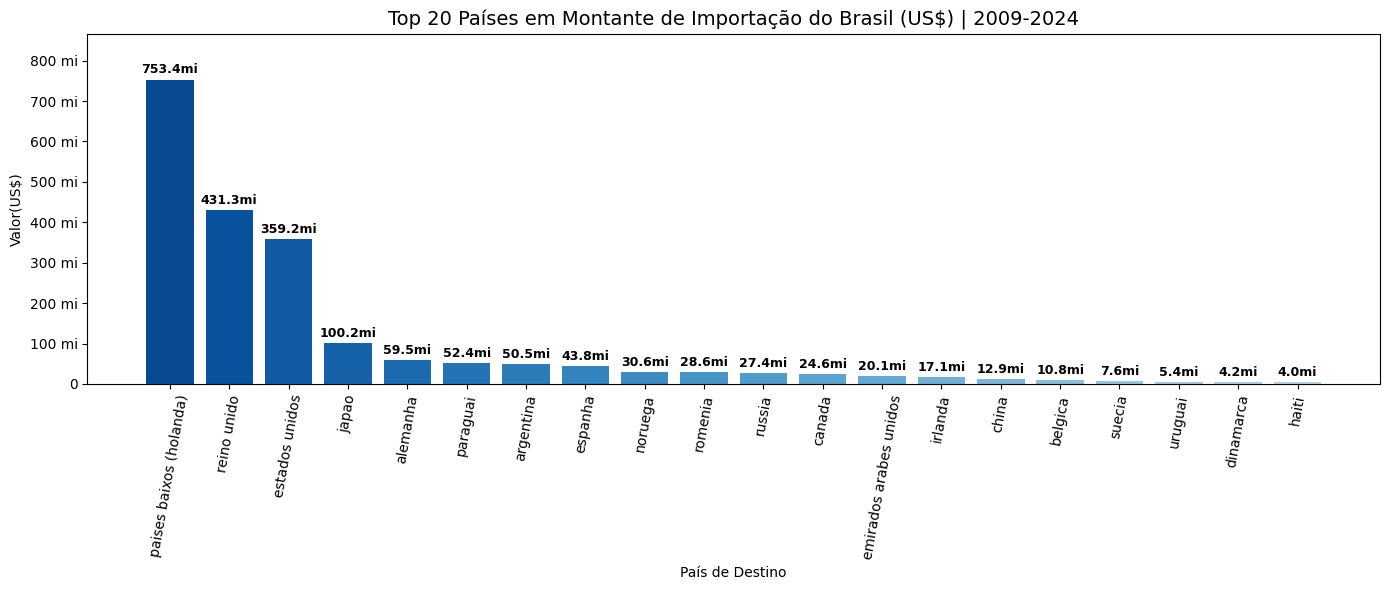

,País de Destino,Valor(US$)
130,paises baixos (holanda),753357290
141,reino unido,431261744
53,estados unidos,359175130
97,japao,100170258
2,alemanha,59505964
134,paraguai,52449043
9,argentina,50480786
52,espanha,43825182
126,noruega,30558272
145,romenia,28569808


In [88]:
# Ordenar e pegar os 20 primeiros países
valor_total_por_pais = valor_total_por_pais.sort_values(by='Valor(US$)', ascending=False)
valor_total_por_pais_top20 = valor_total_por_pais.head(20)

# Formatar o eixo Y somente com valores em milhões
def formatar_valores(valor, pos):
    if valor >= 1_000_000:
        return f'{valor / 1_000_000:.0f} mi'
    elif valor > 0:
        return ''
    else:
        return '0'

# Função para formatar o texto das etiquetas
def formatar_texto(valor):
    if valor >= 1_000_000:
        return f'{valor / 1_000_000:.1f}mi'
    elif valor >= 1_000:
        return f'{valor / 1_000:.0f} mil'
    else:
        return f'{int(valor)}'

# Gera gradiente de azul
cores = plt.cm.Blues(np.linspace(0.3, 0.9, len(valor_total_por_pais_top20)))[::-1]

# Plot
plt.figure(figsize=(14, 6))
barras = plt.bar(
    valor_total_por_pais_top20['País de Destino'],
    valor_total_por_pais_top20['Valor(US$)'],
    color=cores
)

plt.title('Top 20 Países em Montante de Importação do Brasil (US$) | 2009-2024', fontsize=14)
plt.xlabel('País de Destino')
plt.ylabel('Valor(US$)')
plt.xticks(rotation=80)
plt.ylim(0, valor_total_por_pais_top20['Valor(US$)'].max() * 1.15)

# Formatação do eixo Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valores))



# Adiciona rótulos acima das barras
for barra in barras:
    altura = barra.get_height()
    texto = formatar_texto(altura)
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        altura + (valor_total_por_pais_top20['Valor(US$)'].max() * 0.01),
        texto,
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold',
        color='black',
        rotation=0
    )

plt.tight_layout()
plt.show()
valor_total_por_pais_top20

In [89]:
# Visualizando no mapa
dados_map = {
    'pais': [
        'Países Baixos (Holanda)', 'Reino Unido', 'Estados Unidos', 'Japão',
        'Alemanha', 'Paraguai', 'Argentina', 'Espanha', 'Noruega', 'Romênia',
        'Rússia', 'Canadá', 'Emirados Árabes Unidos', 'Irlanda', 'China', 'Bélgica', # Ajustei a ordem aqui para refletir a lista de valores
        'Suécia', 'Uruguai', 'Dinamarca', 'Haiti'
    ],
    'valor_importacao_US$': [
        753357290, 431261744, 359175130, 100170258, 59505964,  # Paises Baixos ... Alemanha
        52449043, 50480786, 43825182, 30558272, 28569808,    # Paraguai ... Romênia
        27440663, 24632093, 20092454, 17073983, 12857595,  # Rússia (NOVO VALOR), Canadá, Emirados, Irlanda, China
        10818030, 7615495, 5406242, 4238063, 3955098     # Bélgica ... Haiti
    ]
}

# Criar o DataFrame a partir do dicionário 'dados_map'
df_map = pd.DataFrame(dados_map)

# Mapear nomes de países para códigos ISO Alpha-3
mapa_paises_iso = {
    'Países Baixos (Holanda)': 'NLD',
    'Reino Unido': 'GBR',
    'Estados Unidos': 'USA',
    'Japão': 'JPN',
    'Alemanha': 'DEU',
    'Paraguai': 'PRY',
    'Argentina': 'ARG',
    'Espanha': 'ESP',
    'Noruega': 'NOR',
    'Romênia': 'ROU',
    'Rússia': 'RUS', # Mantém aqui, pois a ordem em dados_map['pais'] agora está ajustada
    'Canadá': 'CAN',
    'Emirados Árabes Unidos': 'ARE',
    'Irlanda': 'IRL',
    'China': 'CHN',
    'Bélgica': 'BEL',
    'Suécia': 'SWE',
    'Uruguai': 'URY',
    'Dinamarca': 'DNK',
    'Haiti': 'HTI'
}

df_map['ISO_Alpha3'] = df_map['pais'].map(mapa_paises_iso)

# Exibir o DataFrame com os códigos ISO para verificação
print("DataFrame para o mapa:")
print(df_map)

# Verificação de NaNs para garantir que todos os países foram mapeados
if df_map['ISO_Alpha3'].isnull().any():
    print("\nAVISO: Países não mapeados para ISO Alpha-3 (resultarão em NaN):")
    print(df_map[df_map['ISO_Alpha3'].isnull()]['pais'])
else:
    print("\nTodos os países foram mapeados para ISO Alpha-3 com sucesso.")

print("\nVerifique se a coluna 'valor_importacao_US$' tem os valores corretos.")

# Plotar o mapa
fig = px.choropleth(df_map,
                    locations="ISO_Alpha3",
                    color="valor_importacao_US$",
                    hover_name="pais",
                    color_continuous_scale="Viridis",
                    projection="natural earth",
                    title="Top 20 Países em Montante de Importação do Brasil (2009-2023) no Mapa Mundial") # Ajustei o ano final

fig.show()

DataFrame para o mapa:
                       pais  valor_importacao_US$ ISO_Alpha3
0   Países Baixos (Holanda)             753357290        NLD
1               Reino Unido             431261744        GBR
2            Estados Unidos             359175130        USA
3                     Japão             100170258        JPN
4                  Alemanha              59505964        DEU
5                  Paraguai              52449043        PRY
6                 Argentina              50480786        ARG
7                   Espanha              43825182        ESP
8                   Noruega              30558272        NOR
9                   Romênia              28569808        ROU
10                   Rússia              27440663        RUS
11                   Canadá              24632093        CAN
12   Emirados Árabes Unidos              20092454        ARE
13                  Irlanda              17073983        IRL
14                    China              12857595        CHN
1

## Visualizando a Evolução da Exportação Total (2009–2024) | Qtde (litros) x Valor US$

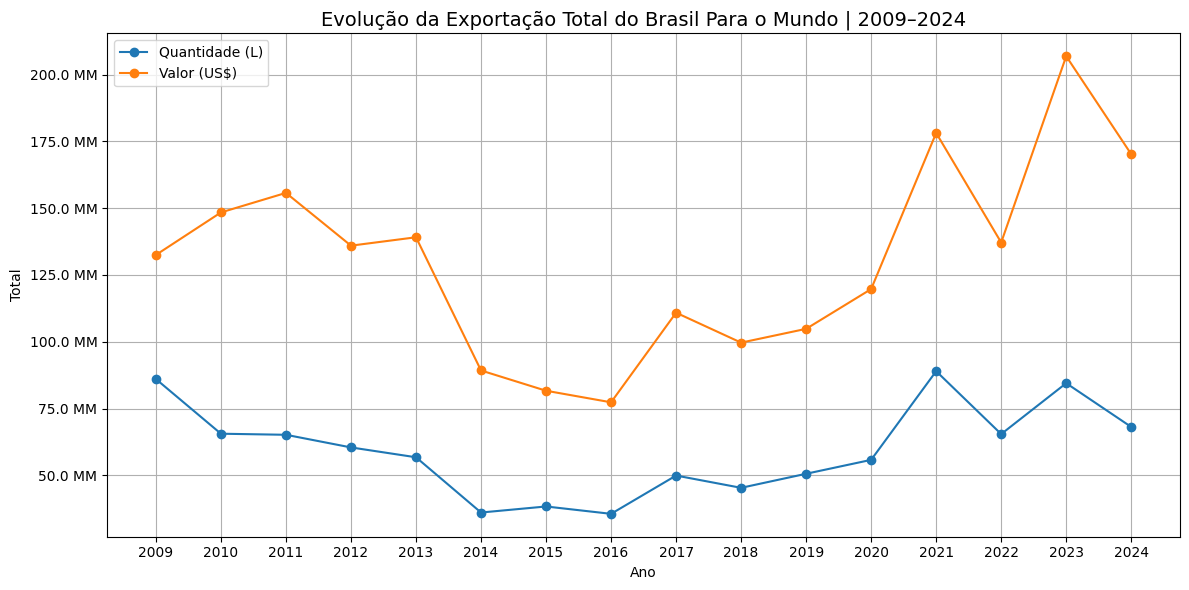

In [90]:
# Lista de chaves correspondentes aos produtos de exportação
arquivos_exportacao = [
    'Exportacao - Espumante',
    'Exportacao - Suco de Uva',
    'Exportacao - Uvas Frescas',
    'Exportacao - Vinho de Mesa'
]

# Inicializa DataFrame acumulador
evolucao_total = pd.DataFrame()

# Loop para somar os dados de todos os arquivos relevantes
for nome in arquivos_exportacao:
    df = dados[nome].copy()

    # Padroniza nomes das colunas (remove espaços, usa minúsculas e underline)
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

    # Converte colunas de ano para formato longo
    colunas_corrigidas = df.melt(id_vars=['id', 'pais'], var_name='ano', value_name='valor_bruto')

    # Extrai somente o ano (quatro dígitos) e converte para numérico
    colunas_corrigidas['ano'] = colunas_corrigidas['ano'].astype(str).str.extract(r'(\d{4})')
    colunas_corrigidas['ano'] = pd.to_numeric(colunas_corrigidas['ano'], errors='coerce')

    # Remove linhas sem ano válido
    colunas_corrigidas = colunas_corrigidas.dropna(subset=['ano'])

    # Adiciona coluna de tipo de dado (quantidade ou valor)
    colunas_corrigidas['tipo'] = colunas_corrigidas.groupby(['id', 'ano']).cumcount().map({0: 'quantidade_l', 1: 'valor_usd'})

    # Converte para formato largo novamente, separando por tipo
    dados_ano = colunas_corrigidas.pivot_table(index='ano', columns='tipo', values='valor_bruto', aggfunc='sum').reset_index()

    # Garante que os valores estejam no formato correto
    dados_ano['quantidade_l'] = pd.to_numeric(dados_ano['quantidade_l'], errors='coerce')
    dados_ano['valor_usd'] = pd.to_numeric(dados_ano['valor_usd'], errors='coerce')

    # Acumula os dados por ano
    if evolucao_total.empty:
        evolucao_total = dados_ano
    else:
        evolucao_total = evolucao_total.merge(dados_ano, on='ano', how='outer', suffixes=('', '_novo'))
        evolucao_total['quantidade_l'] = evolucao_total[['quantidade_l', 'quantidade_l_novo']].sum(axis=1)
        evolucao_total['valor_usd'] = evolucao_total[['valor_usd', 'valor_usd_novo']].sum(axis=1)
        evolucao_total.drop(columns=['quantidade_l_novo', 'valor_usd_novo'], inplace=True)

# Filtra anos de 2009 a 2024
evolucao_total = evolucao_total[(evolucao_total['ano'] > 2008) & (evolucao_total['ano'] <= 2024)]

# Ordena por ano
evolucao_total = evolucao_total.sort_values('ano')

# Função para formatar os valores no eixo Y
def formatar_valores(valor, pos):
    if valor >= 1_000_000:
        return f'{valor/1_000_000:.1f} MM'
    elif valor >= 1_000:
        return f'{valor/1_000:.0f} K'
    else:
        return int(valor)

# Gráfico
plt.figure(figsize=(12, 6))
plt.plot(evolucao_total['ano'], evolucao_total['quantidade_l'], marker='o', label='Quantidade (L)')
plt.plot(evolucao_total['ano'], evolucao_total['valor_usd'], marker='o', label='Valor (US$)')

# Título e rótulos
plt.title('Evolução da Exportação Total do Brasil Para o Mundo | 2009–2024', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Total')

# Customizações
plt.grid(True)
plt.legend()
plt.xticks(ticks=evolucao_total['ano'].tolist())

# Formatação do eixo Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valores))

plt.tight_layout()
plt.show()


In [91]:
evolucao_total

tipo,ano,quantidade_l,valor_usd
39,2009,86023485,132483328
40,2010,65570616,148387866
41,2011,65170313,155704050
42,2012,60439702,135953307
43,2013,56755915,139095767
44,2014,36077345,89238836
45,2015,38338590,81655009
46,2016,35583010,77326129
47,2017,49914400,110857951
48,2018,45319848,99656189


# Exportação de vinhos no Brasil | Análise

Avaliando montante de vinho de mesa exportado do Brasil para mundo entre os anos de 2009 e 2024.

In [92]:
def remover_acentos(txt):
    return ''.join(c for c in unicodedata.normalize('NFD', txt) if unicodedata.category(c) != 'Mn')

# Detectar separador (caso a função esteja definida em outro trecho)
def detectar_separador(caminho_arquivo, n_linhas=5):
    with open(caminho_arquivo, 'r', encoding='utf-8', errors='ignore') as f:
        linhas = [f.readline() for _ in range(n_linhas)]

    # Contar ocorrências de cada separador potencial
    tabs = sum([linha.count('\t') for linha in linhas])
    virgulas = sum([linha.count(',') for linha in linhas])
    ponto_virgulas = sum([linha.count(';') for linha in linhas])

    if tabs > n_linhas * 0.5: # Heurística: se mais da metade das linhas têm tabs, provavelmente é tab
         return '\t'
    elif ponto_virgulas > virgulas:
        return ';'
    elif virgulas > 0 : # Se houver vírgulas e não for tab ou ponto e vírgula
        return ','
    else: # Fallback ou se nenhum for claramente dominante (ou para arquivos de uma só coluna)
        return '\t' # Ou ',' como um default, mas para SEU arquivo, TAB é o correto

# Define o caminho do arquivo
arquivo_vinho_mesa = os.path.join("Export Dados", "Exportacao - Vinho de Mesa.csv")

# Detecta o separador
sep = detectar_separador(arquivo_vinho_mesa)

# Tenta leitura com UTF-8, se falhar tenta ISO-8859-1
try:
    df_vinhos_mesa = pd.read_csv(arquivo_vinho_mesa, sep=sep, encoding='utf-8')
except UnicodeDecodeError:
    df_vinhos_mesa = pd.read_csv(arquivo_vinho_mesa, sep=sep, encoding='iso-8859-1')

# Remove a coluna 'id' se existir
if 'id' in df_vinhos_mesa.columns:
    df_vinhos_mesa = df_vinhos_mesa.drop(columns=['id'])

# Padroniza os nomes das colunas
df_vinhos_mesa.columns = [remover_acentos(col).strip().lower().replace(' ', '_') for col in df_vinhos_mesa.columns]

# Renomeia 'paas' para 'pais' se necessário
if 'paas' in df_vinhos_mesa.columns:
    df_vinhos_mesa.rename(columns={'paas': 'pais'}, inplace=True)

# Aplica o dicionário de países (defina este dicionário antes de rodar este bloco)
df_vinhos_mesa['pais'] = df_vinhos_mesa['pais'].map(dicionario_paises_normalizados).fillna(df_vinhos_mesa['pais'])

# Seleciona apenas colunas que representam anos (começam com '19' ou '20')
colunas_ano = [col for col in df_vinhos_mesa.columns if col.startswith('19') or col.startswith('20')]

# Garante que os anos estejam ordenados e sem repetição
anos_unicos = sorted(list(dict.fromkeys(colunas_ano)))

registros = []

# Loop pelos pares de colunas: quantidade e valor
for i in range(0, len(anos_unicos), 2):
    col_quant = anos_unicos[i]
    col_valor = anos_unicos[i+1] if i+1 < len(anos_unicos) else None

    if col_valor is None:
        continue  # pula se não houver par completo

    df_temp = df_vinhos_mesa[['pais', col_quant, col_valor]].copy()
    df_temp.columns = ['pais', 'quantidade(L)', 'valor(US$)']
    df_temp['ano'] = int(col_quant)

    registros.append(df_temp)

# Junta todos os anos
dados_vinhos_mesa = pd.concat(registros, ignore_index=True)

# Converte valores para numérico
dados_vinhos_mesa['quantidade(L)'] = pd.to_numeric(dados_vinhos_mesa['quantidade(L)'], errors='coerce').fillna(0)
dados_vinhos_mesa['valor(US$)'] = pd.to_numeric(dados_vinhos_mesa['valor(US$)'], errors='coerce').fillna(0)

# Remove países com todos os valores zerados
agrupado = dados_vinhos_mesa.groupby('pais')[['quantidade(L)', 'valor(US$)']].sum()
paises_remover = agrupado[(agrupado['quantidade(L)'] == 0) & (agrupado['valor(US$)'] == 0)].index.tolist()
dados_vinhos_mesa = dados_vinhos_mesa[~dados_vinhos_mesa['pais'].isin(paises_remover)]

# Filtra apenas de 2009 a 2023
dados_vinhos_mesa = dados_vinhos_mesa[(dados_vinhos_mesa['ano'] >= 2009) & (dados_vinhos_mesa['ano'] <= 2024)]

# Ajusta as colunas para o formato final
dados_vinhos_mesa['País de Origem'] = 'Brasil'
dados_vinhos_mesa.rename(columns={'pais': 'País de Destino'}, inplace=True)
dados_vinhos_mesa = dados_vinhos_mesa[['ano', 'País de Origem', 'País de Destino', 'quantidade(L)', 'valor(US$)']]

# Visualiza resultado final
dados_vinhos_mesa.tail()


,ano,País de Origem,País de Destino,quantidade(L),valor(US$)
7750,2024,Brasil,tuvalu,0,0
7751,2024,Brasil,uruguai,36729,62325
7752,2024,Brasil,vanuatu,0,0
7753,2024,Brasil,venezuela,122922,199418
7754,2024,Brasil,vietna,16,41


Verficando paises que nao tiveram 0 importação de vinhos Brasileiros na somatória de todos os anos

In [93]:
#Verificando se temos paises zerados
verificacao = dados_vinhos_mesa.groupby('País de Destino')[['quantidade(L)', 'valor(US$)']].sum()
paises_zerados = verificacao[
    (verificacao['quantidade(L)'] == 0) & (verificacao['valor(US$)'] == 0)
]
print("Países com todos os valores zerados:")
print(paises_zerados)

Países com todos os valores zerados:
                      quantidade(L)  valor(US$)
País de Destino                                
anguilla                          0           0
costa do marfim                   0           0
costa rica                        0           0
eslovaquia                        0           0
ilhas virgens                     0           0
iraque                            0           0
jamaica                           0           0
libano                            0           0
namibia                           0           0
porto rico                        0           0
republica dominicana              0           0
senegal                           0           0
tunisia                           0           0


Organizando dos maiores importadores pros menores

In [94]:
top10_valor = (dados_vinhos_mesa.groupby('País de Destino', as_index=False)['valor(US$)'].sum().sort_values(by='valor(US$)', ascending=False).head(10))

# Formata os valores como string com separador de milhar
top10_valor['valor(US$)'] = top10_valor['valor(US$)'].apply(lambda x: f'{int(x):,}')

# Visualiza como tabela
top10_valor.reset_index(drop=True)

,País de Destino,valor(US$)
0,paraguai,"47,984,063"
1,russia,"23,152,054"
2,estados unidos,"9,957,775"
3,china,"5,086,290"
4,reino unido,"4,747,648"
5,haiti,"3,912,007"
6,espanha,"3,807,951"
7,Países Baixos,"3,035,719"
8,japao,"2,324,119"
9,alemanha,"2,196,372"


## Gráficos de Exportação de Vinhos do Brasil ao Mundo

Agora iremos conseguir visualizar um pouco dos dados graficamente.
Abaixo temos:

- Gráfico de evolução da exportação total por ano
- Top 10 países por valor total

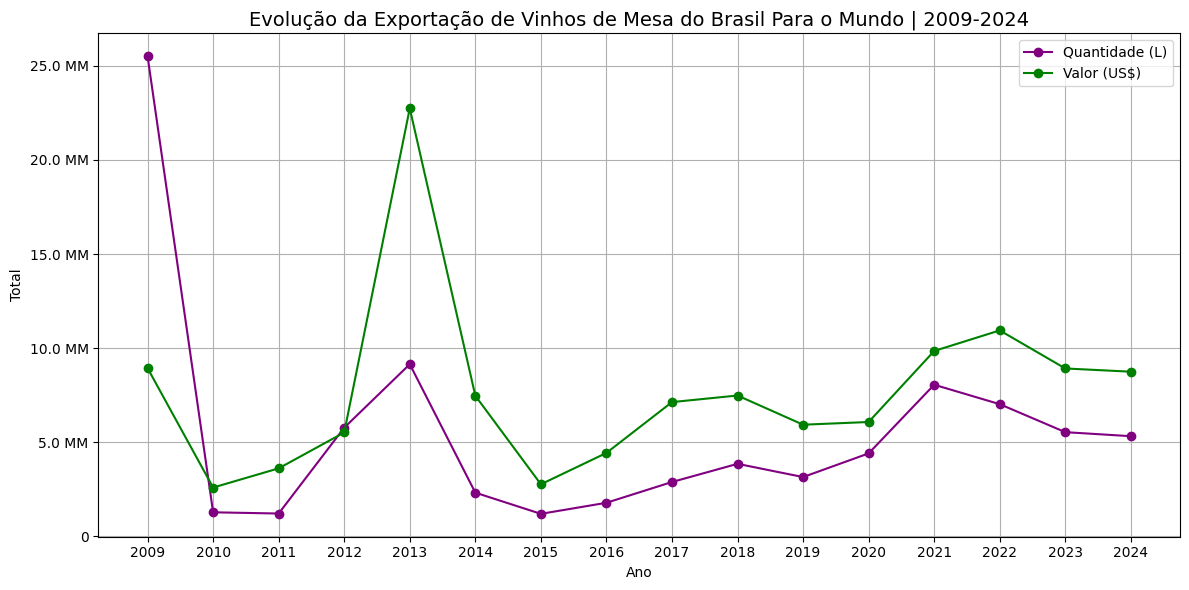

In [97]:
# Gráfico Evolução total por ano
evolucao_vinhos = dados_vinhos_mesa.groupby('ano')[['quantidade(L)', 'valor(US$)']].sum().reset_index()

# Função de formatação
def formatar_valores(valor, pos):
    if valor >= 1_000_000:
        return f'{valor/1_000_000:.1f} MM'
    elif valor >= 1_000:
        return f'{valor/1_000:.0f} K'
    else:
        return int(valor)

# Gráfico com eixos formatados
plt.figure(figsize=(12, 6))
plt.plot(evolucao_vinhos['ano'], evolucao_vinhos['quantidade(L)'], marker='o',color='purple', label='Quantidade (L)')
plt.plot(evolucao_vinhos['ano'], evolucao_vinhos['valor(US$)'], marker='o', color='green', label='Valor (US$)')
plt.title('Evolução da Exportação de Vinhos de Mesa do Brasil Para o Mundo | 2009-2024', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Total')
plt.grid(True)
plt.legend()
plt.xticks(ticks=evolucao_vinhos['ano'].tolist())

# Aplica formatação ao eixo Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valores))

plt.tight_layout()
plt.show()

In [ ]:
evolucao_vinhos

,ano,quantidade(L),valor(US$)
0,2009,25514198,8940988
1,2010,1280574,2595303
2,2011,1214834,3615120
3,2012,5775376,5521293
4,2013,9149059,22744845
5,2014,2324029,7472795
6,2015,1198479,2769160
7,2016,1786549,4434704
8,2017,2889572,7135607
9,2018,3856162,7486063


## Top 5 países que mais importaram Vinhos de mesa por valor total


In [ ]:
# Top 5 países que mais importaram por valor total
top_paises_importadores_vinho = (dados_vinhos_mesa.groupby('País de Destino')['valor(US$)'].sum().sort_values(ascending=False).head(5).reset_index())
                                 
# Formata os valores em milhões ou milhares
def formatar_valor_tabela(valor):
    if valor >= 1_000_000:
        return f'{valor / 1_000_000:.2f} mi'
    elif valor >= 1_000:
        return f'{valor / 1_000:.0f} mil'
    else:
        return f'{valor:.0f}'

# Aplica a formatação
top_paises_importadores_vinho['valor_formatado'] = top_paises_importadores_vinho['valor(US$)'].apply(formatar_valor_tabela)

# Mostra a tabela final
tabela_final_vinhos = top_paises_importadores_vinho[['País de Destino', 'valor_formatado']]
tabela_final_vinhos.columns = ['País', 'Valor Total (US$)']
print(tabela_final_vinhos.to_string(index=False))

          País Valor Total (US$)
      paraguai          47.98 mi
        russia          23.15 mi
estados unidos           9.96 mi
         china           5.09 mi
   reino unido           4.75 mi


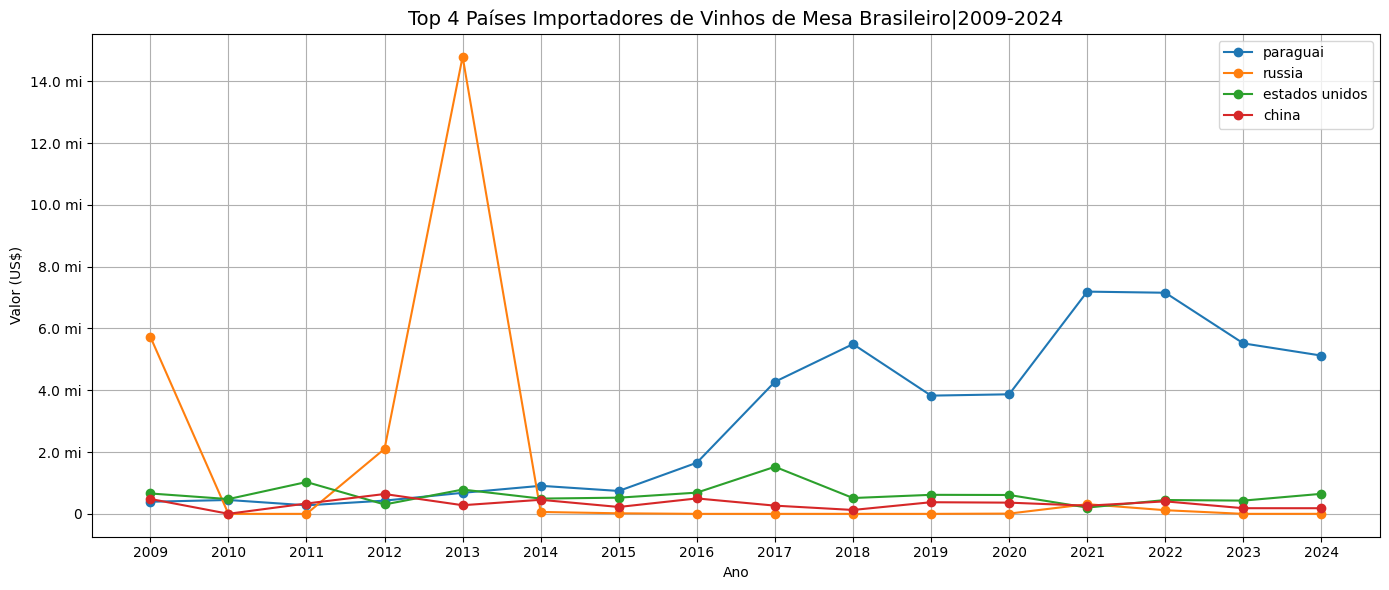

In [ ]:
# Função para formatar valores do eixo Y
def formatar_valores(valor, pos):
    if valor >= 1_000_000:
        return f'{valor / 1_000_000:.1f} mi'
    elif valor >= 1_000:
        return f'{valor / 1_000:.0f} mil'
    else:
        return int(valor)

# Top 10 países que mais importaram por valor total
top_paises_importadores_vinho = (dados_vinhos_mesa.groupby('País de Destino')['valor(US$)'].sum().sort_values(ascending=False).head(4))

# Lista de países ordenada por valor total
paises_ordenados = top_paises_importadores_vinho.index.tolist()

#plot
fig, ax = plt.subplots(figsize=(14, 6))

# Guarda os "handles" manualmente
handles = []
labels = []

# Plota os países na ordem correta
for pais in paises_ordenados:
    linha = dados_vinhos_mesa[dados_vinhos_mesa['País de Destino'] == pais].groupby('ano')['valor(US$)'].sum()
    h, = ax.plot(linha.index, linha.values, marker='o', label=pais)
    handles.append(h)
    labels.append(pais)

# Aplica manualmente a legenda na ordem desejada
ax.legend(handles, labels)

# Eixos e formatação
ax.set_title('Top 4 Países Importadores de Vinhos de Mesa Brasileiro|2009-2024', fontsize=14)
ax.set_xlabel('Ano')
ax.set_ylabel('Valor (US$)')
ax.grid(True)
ax.xaxis.set_ticks(sorted(dados_vinhos_mesa['ano'].unique()))
ax.yaxis.set_major_formatter(FuncFormatter(formatar_valores))

plt.tight_layout()
plt.show()

## Exportação de Espumantes no Brasil | Análise

Avaliando montante de Espumantes do Brasil para mundo entre os anos de 2009 e 2024.

In [ ]:
# Define o caminho do arquivo
arquivo_espumantes = os.path.join("Export Dados", "Exportacao - Espumante.csv")

# Detecta o separador
sep = detectar_separador(arquivo_espumantes)

# Tenta leitura com UTF-8, se falhar tenta ISO-8859-1
try:
    df_espumantes = pd.read_csv(arquivo_espumantes, sep=sep, encoding='utf-8')
except UnicodeDecodeError:
    df_espumantes = pd.read_csv(arquivo_espumantes, sep=sep, encoding='iso-8859-1')

# Remove a coluna 'id' se existir
if 'id' in df_espumantes.columns:
    df_espumantes = df_espumantes.drop(columns=['id'])

# Padroniza os nomes das colunas
df_espumantes.columns = [remover_acentos(col).strip().lower().replace(' ', '_') for col in df_espumantes.columns]

# Renomeia 'paas' para 'pais' se necessário
if 'paas' in df_espumantes.columns:
    df_espumantes.rename(columns={'paas': 'pais'}, inplace=True)

# Aplica o dicionário de países
df_espumantes['pais'] = df_espumantes['pais'].map(dicionario_paises_normalizados).fillna(df_espumantes['pais'])

# Seleciona apenas colunas que representam anos (começam com '19' ou '20')
colunas_ano = [col for col in df_espumantes.columns if col.startswith('19') or col.startswith('20')]

# Garante que os anos estejam ordenados e sem repetição
anos_unicos = sorted(list(dict.fromkeys(colunas_ano)))

registros = []

# Loop pelos pares de colunas: quantidade e valor
for i in range(0, len(anos_unicos), 2):
    col_quant = anos_unicos[i]
    col_valor = anos_unicos[i+1] if i+1 < len(anos_unicos) else None

    if col_valor is None:
        continue  # pula se não houver par completo

    df_temp = df_espumantes[['pais', col_quant, col_valor]].copy()
    df_temp.columns = ['pais', 'quantidade(L)', 'valor(US$)']
    df_temp['ano'] = int(col_quant)

    registros.append(df_temp)

# Junta todos os anos
dados_espumantes = pd.concat(registros, ignore_index=True)

# Converte valores para numérico
dados_espumantes['quantidade(L)'] = pd.to_numeric(dados_espumantes['quantidade(L)'], errors='coerce').fillna(0)
dados_espumantes['valor(US$)'] = pd.to_numeric(dados_espumantes['valor(US$)'], errors='coerce').fillna(0)

# Remove países com todos os valores zerados
agrupado = dados_espumantes.groupby('pais')[['quantidade(L)', 'valor(US$)']].sum()
paises_remover = agrupado[(agrupado['quantidade(L)'] == 0) & (agrupado['valor(US$)'] == 0)].index.tolist()
dados_espumantes = dados_espumantes[~dados_espumantes['pais'].isin(paises_remover)]

# Filtra apenas de 2009 a 2024
dados_espumantes = dados_espumantes[(dados_espumantes['ano'] >= 2009) & (dados_espumantes['ano'] <= 2024)]

# Visualiza resultado
dados_espumantes.head(10)

,pais,quantidade(L),valor(US$),ano
4173,africa do sul,0,0,2009
4174,alemanha,6648,29018,2009
4175,angola,11393,33664,2009
4176,Antigua e Barbuda,0,0,2009
4177,antilhas holandesas,180,1660,2009
4178,argentina,0,0,2009
4179,aruba,0,0,2009
4180,australia,0,0,2009
4181,bahamas,0,0,2009
4182,bangladesh,0,0,2009


Verficando paises que nao tiveram 0 importação de espumantes brasileiros na somatória de todos os anos

In [ ]:
#Verificando se temos paises zerados
verificacao_espumantes = dados_espumantes.groupby('pais')[['quantidade(L)', 'valor(US$)']].sum()
paises_zerados_espumantes = verificacao_espumantes[
    (verificacao_espumantes['quantidade(L)'] == 0) & (verificacao_espumantes['valor(US$)'] == 0)
]
print("Países com todos os valores zerados:")
print(paises_zerados_espumantes)

Países com todos os valores zerados:
                      quantidade(L)  valor(US$)
pais                                           
iraque                            0           0
outros                            0           0
republica dominicana              0           0


Organizando dos maiores para os menores

In [ ]:
top10_espumantes = (dados_espumantes.groupby('pais', as_index=False)['valor(US$)'].sum().sort_values(by='valor(US$)', ascending=False).head(10))

# Formata os valores como string com separador de milhar
top10_espumantes['valor(US$)'] = top10_espumantes['valor(US$)'].apply(lambda x: f'{int(x):,}')

# Visualiza como tabela
top10_espumantes.reset_index(drop=True)

,pais,valor(US$)
0,estados unidos,"10,183,380"
1,paraguai,"1,875,736"
2,reino unido,"1,652,685"
3,angola,"1,226,906"
4,uruguai,"853,210"
5,belgica,"625,253"
6,china,"586,351"
7,japao,"555,693"
8,chile,"532,206"
9,franca,"358,364"


## Gráficos de Exportação de Espumantes do Brasil ao Mundo

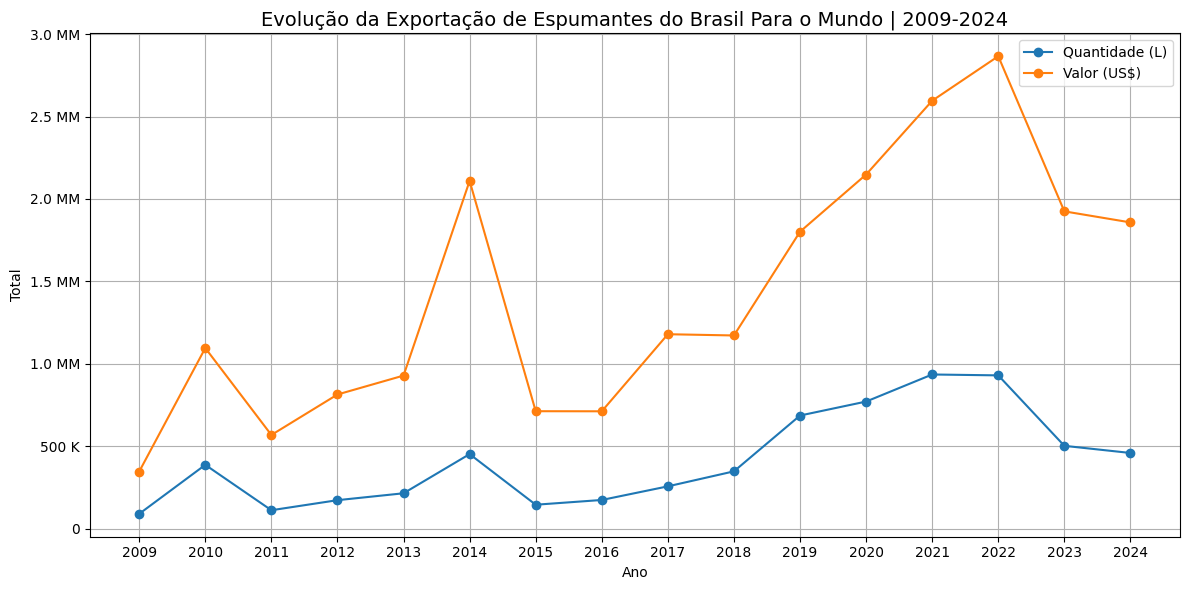

In [ ]:
# Gráfico Evolução total por ano
evolucao_espumantes = dados_espumantes.groupby('ano')[['quantidade(L)', 'valor(US$)']].sum().reset_index()

# Função de formatação
def formatar_valores(valor, pos):
    if valor >= 1_000_000:
        return f'{valor/1_000_000:.1f} MM'
    elif valor >= 1_000:
        return f'{valor/1_000:.0f} K'
    else:
        return int(valor)

# Gráfico com eixos formatados
plt.figure(figsize=(12, 6))
plt.plot(evolucao_espumantes['ano'], evolucao_espumantes['quantidade(L)'], marker='o', label='Quantidade (L)')
plt.plot(evolucao_espumantes['ano'], evolucao_espumantes['valor(US$)'], marker='o', label='Valor (US$)')
plt.title('Evolução da Exportação de Espumantes do Brasil Para o Mundo | 2009-2024', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Total')
plt.grid(True)
plt.legend()
plt.xticks(ticks=evolucao_espumantes['ano'].tolist())

# Aplica formatação ao eixo Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valores))

plt.tight_layout()
plt.show()


In [ ]:
evolucao_espumantes

,ano,quantidade(L),valor(US$)
0,2009,89981,346551
1,2010,387160,1095632
2,2011,111882,568390
3,2012,172824,813909
4,2013,214701,928626
5,2014,452335,2109416
6,2015,145282,712535
7,2016,174049,711991
8,2017,256746,1179471
9,2018,347772,1171928


## Top 5 países que mais importaram Espumantes por valor total


In [ ]:
# Top 5 países que mais importaram por valor total
top_paises_importadores_espumantes = (
    dados_espumantes.groupby('pais')['valor(US$)'].sum().sort_values(ascending=False).head(5).reset_index())

# Formata os valores em milhões ou milhares
def formatar_valor_tabela(valor):
    if valor >= 1_000_000:
        return f'{valor / 1_000_000:.2f} mi'
    elif valor >= 1_000:
        return f'{valor / 1_000:.0f} mil'
    else:
        return f'{valor:.0f}'

# Aplica a formatação
top_paises_importadores_espumantes['valor_formatado'] = top_paises_importadores_espumantes['valor(US$)'].apply(formatar_valor_tabela)

# Mostra a tabela final
tabela_final_espumantes = top_paises_importadores_espumantes[['pais', 'valor_formatado']]
tabela_final_espumantes.columns = ['País', 'Valor Total (US$)']
print(tabela_final_espumantes.to_string(index=False))

          País Valor Total (US$)
estados unidos          10.18 mi
      paraguai           1.88 mi
   reino unido           1.65 mi
        angola           1.23 mi
       uruguai           853 mil


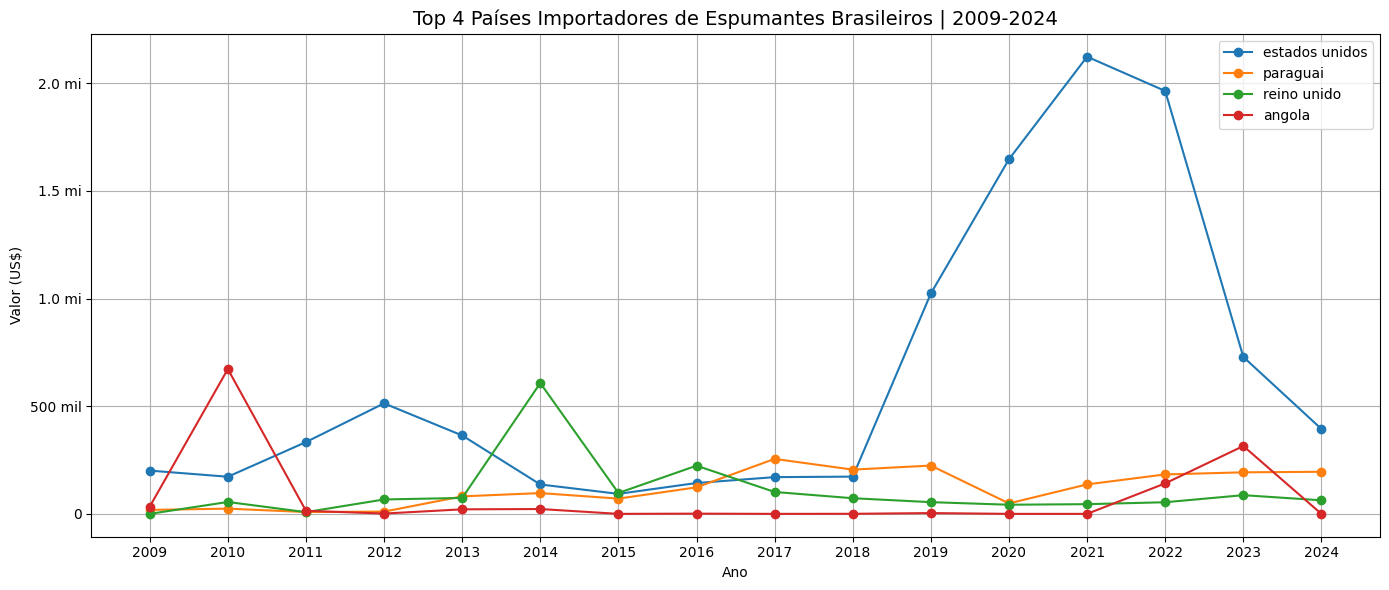

In [ ]:
# Função para formatar valores do eixo Y
def formatar_valores(valor, pos):
    if valor >= 1_000_000:
        return f'{valor / 1_000_000:.1f} mi'
    elif valor >= 1_000:
        return f'{valor / 1_000:.0f} mil'
    else:
        return int(valor)

# Top 10 países que mais importaram por valor total
top_paises_importadores_espumantes = (dados_espumantes.groupby('pais')['valor(US$)'].sum().sort_values(ascending=False).head(4))

# Lista de países ordenada por valor total
paises_ordenados_espumantes = top_paises_importadores_espumantes.index.tolist()

#plot
fig, ax = plt.subplots(figsize=(14, 6))

# Guarda os "handles" manualmente
handles = []
labels = []

# Plota os países na ordem correta
for pais in paises_ordenados_espumantes:
    linha = dados_espumantes[dados_espumantes['pais'] == pais].groupby('ano')['valor(US$)'].sum()
    h, = ax.plot(linha.index, linha.values, marker='o', label=pais)
    handles.append(h)
    labels.append(pais)

# Aplica manualmente a legenda na ordem desejada
ax.legend(handles, labels)

# Eixos e formatação
ax.set_title('Top 4 Países Importadores de Espumantes Brasileiros | 2009-2024', fontsize=14)
ax.set_xlabel('Ano')
ax.set_ylabel('Valor (US$)')
ax.grid(True)
ax.xaxis.set_ticks(sorted(dados_espumantes['ano'].unique()))
ax.yaxis.set_major_formatter(FuncFormatter(formatar_valores))

plt.tight_layout()
plt.show()

In [ ]:
top_paises_importadores_espumantes

pais
estados unidos    10183380
paraguai           1875736
reino unido        1652685
angola             1226906
Name: valor(US$), dtype: int64

## Exportação de Suco de Uva | Análise

Avaliando montante de Suco de Uva do Brasil para mundo entre os anos de 2009 e 2024.

In [ ]:
# Define o caminho do arquivo
arquivo_suco_uva = os.path.join("Export Dados", "Exportacao - Suco de Uva.csv")

# Detecta o separador
sep = detectar_separador(arquivo_suco_uva)

# Tenta leitura com UTF-8, se falhar tenta ISO-8859-1
try:
    df_suco_uva = pd.read_csv(arquivo_suco_uva, sep=sep, encoding='utf-8')
except UnicodeDecodeError:
    df_suco_uva = pd.read_csv(arquivo_suco_uva, sep=sep, encoding='iso-8859-1')

# Remove a coluna 'id' se existir
if 'id' in df_suco_uva.columns:
    df_suco_uva = df_suco_uva.drop(columns=['id'])

# Padroniza os nomes das colunas
df_suco_uva.columns = [remover_acentos(col).strip().lower().replace(' ', '_') for col in df_suco_uva.columns]

# Renomeia 'paas' para 'pais' se necessário
if 'paas' in df_suco_uva.columns:
    df_suco_uva.rename(columns={'paas': 'pais'}, inplace=True)

# Aplica o dicionário de países
df_suco_uva['pais'] = df_suco_uva['pais'].map(dicionario_paises_normalizados).fillna(df_suco_uva['pais'])

# Seleciona apenas colunas que representam anos (começam com '19' ou '20')
colunas_ano = [col for col in df_suco_uva.columns if col.startswith('19') or col.startswith('20')]

# Garante que os anos estejam ordenados e sem repetição
anos_unicos = sorted(list(dict.fromkeys(colunas_ano)))

registros = []

# Loop pelos pares de colunas: quantidade e valor
for i in range(0, len(anos_unicos), 2):
    col_quant = anos_unicos[i]
    col_valor = anos_unicos[i+1] if i+1 < len(anos_unicos) else None

    if col_valor is None:
        continue  # pula se não houver par completo

    df_temp = df_suco_uva[['pais', col_quant, col_valor]].copy()
    df_temp.columns = ['pais', 'quantidade(L)', 'valor(US$)']
    df_temp['ano'] = int(col_quant)

    registros.append(df_temp)

# Junta todos os anos
dados_suco_uva = pd.concat(registros, ignore_index=True)

# Converte valores para numérico
dados_suco_uva['quantidade(L)'] = pd.to_numeric(dados_suco_uva['quantidade(L)'], errors='coerce').fillna(0)
dados_suco_uva['valor(US$)'] = pd.to_numeric(dados_suco_uva['valor(US$)'], errors='coerce').fillna(0)

# Remove países com todos os valores zerados
agrupado = dados_suco_uva.groupby('pais')[['quantidade(L)', 'valor(US$)']].sum()
paises_remover = agrupado[(agrupado['quantidade(L)'] == 0) & (agrupado['valor(US$)'] == 0)].index.tolist()
dados_suco_uva = dados_suco_uva[~dados_suco_uva['pais'].isin(paises_remover)]

# Filtra apenas de 2009 a 2024
dados_suco_uva = dados_suco_uva[(dados_suco_uva['ano'] >= 2009) & (dados_suco_uva['ano'] <= 2024)]

# Visualiza resultado
dados_suco_uva.head(10)

,pais,quantidade(L),valor(US$),ano
4875,africa do sul,0,0,2009
4876,alemanha,0,0,2009
4877,angola,237494,191270,2009
4878,antigua e barbuda,0,0,2009
4879,antilhas holandesas,0,0,2009
4880,arabia saudita,48760,124520,2009
4881,argelia,0,0,2009
4882,argentina,1260,6979,2009
4883,aruba,5008,3270,2009
4884,australia,0,0,2009


Avaliando quais paies possuem 0 exportação de Suco e Uva

In [ ]:
#Verificando se temos paises zerados
verificacao_suco_uva = dados_suco_uva.groupby('pais')[['quantidade(L)', 'valor(US$)']].sum()
paises_zerados_suco_uva = verificacao_suco_uva[
    (verificacao_suco_uva['quantidade(L)'] == 0) & (verificacao_suco_uva['valor(US$)'] == 0)
]
print("Países com todos os valores zerados:")
print(paises_zerados_suco_uva)

Países com todos os valores zerados:
                           quantidade(L)  valor(US$)
pais                                                
antilhas holandesas                    0           0
austria                                0           0
congo                                  0           0
costa do marfim                        0           0
cuba                                   0           0
el salvador                            0           0
hungria                                0           0
iraque                                 0           0
iugoslavia (antiga)                    0           0
jamaica                                0           0
mauritania                             0           0
namibia                                0           0
paquistao                              0           0
republica centro-africana              0           0
senegal                                0           0
suecia                                 0           0
tanzania 

Organizando dos maiores para os menores

In [ ]:
top10_suco_uva = (dados_suco_uva.groupby('pais', as_index=False)['valor(US$)'].sum().sort_values(by='valor(US$)', ascending=False).head(10))

# Formata os valores como string com separador de milhar
top10_suco_uva['valor(US$)'] = top10_suco_uva['valor(US$)'].apply(lambda x: f'{int(x):,}')

# Visualiza como tabela
top10_suco_uva.reset_index(drop=True)

,pais,valor(US$)
0,japao,"97,279,630"
1,estados unidos,"8,621,653"
2,china,"7,157,565"
3,venezuela,"3,025,511"
4,paraguai,"2,581,019"
5,mexico,"2,396,179"
6,porto rico,"1,434,112"
7,republica dominicana,"1,417,371"
8,libia,"1,200,337"
9,trindade e tobago,"725,255"


## Gráficos de Exportação de Suco de Uva do Brasil ao Mundo

Visualizando nossos dados:

- Gráfico de evolução da exportação total por ano
- Top 10 países por valor total

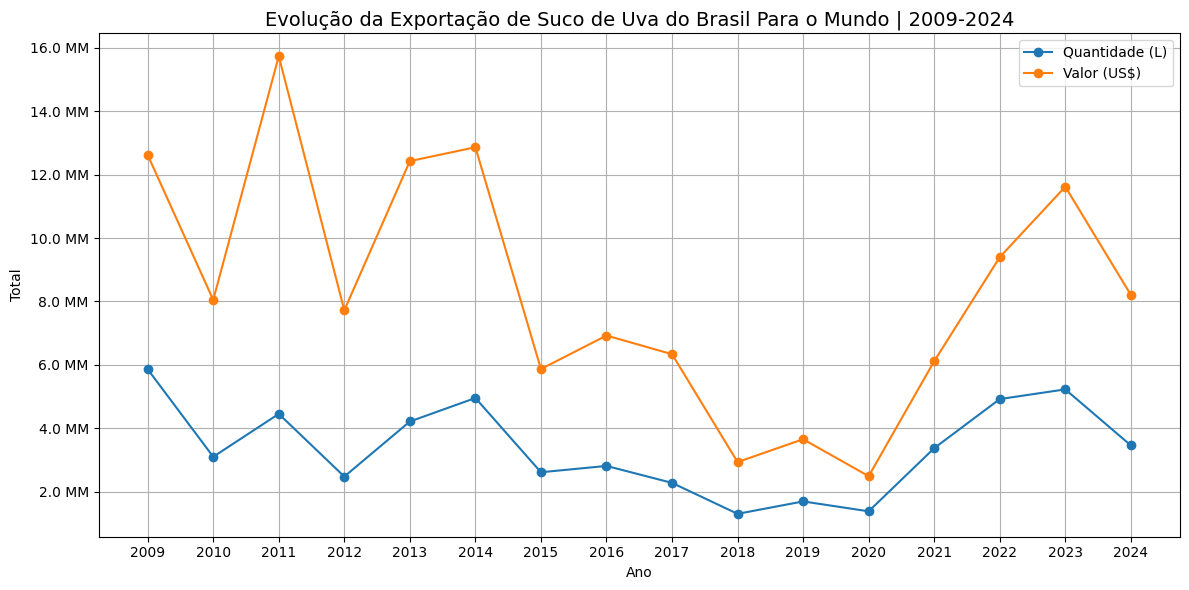

In [ ]:
# Gráfico Evolução total por ano
evolucao_suco_uva = dados_suco_uva.groupby('ano')[['quantidade(L)', 'valor(US$)']].sum().reset_index()

# Função de formatação
def formatar_valores(valor, pos):
    if valor >= 1_000_000:
        return f'{valor/1_000_000:.1f} MM'
    elif valor >= 1_000:
        return f'{valor/1_000:.0f} K'
    else:
        return int(valor)

# Gráfico com eixos formatados
plt.figure(figsize=(12, 6))
plt.plot(evolucao_suco_uva['ano'], evolucao_suco_uva['quantidade(L)'], marker='o', label='Quantidade (L)')
plt.plot(evolucao_suco_uva['ano'], evolucao_suco_uva['valor(US$)'], marker='o', label='Valor (US$)')
plt.title('Evolução da Exportação de Suco de Uva do Brasil Para o Mundo | 2009-2024', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Total')
plt.grid(True)
plt.legend()
plt.xticks(ticks=evolucao_suco_uva['ano'].tolist())

# Aplica formatação ao eixo Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valores))

plt.tight_layout()
plt.show()


In [ ]:
evolucao_suco_uva

,ano,quantidade(L),valor(US$)
0,2009,5859622,12621332
1,2010,3097697,8048125
2,2011,4452115,15737683
3,2012,2473423,7719833
4,2013,4211599,12427609
5,2014,4953029,12865797
6,2015,2610146,5866363
7,2016,2809237,6924304
8,2017,2274633,6335596
9,2018,1297681,2931466


## Top 5 países que mais importaram Suco de Uva por valor total

In [ ]:
# Top 5 países que mais importaram por valor total
top_paises_importadores_suco_uva = (
    dados_suco_uva.groupby('pais')['valor(US$)'].sum().sort_values(ascending=False).head(5).reset_index())

# Formata os valores em milhões ou milhares
def formatar_valor_tabela(valor):
    if valor >= 1_000_000:
        return f'{valor / 1_000_000:.2f} mi'
    elif valor >= 1_000:
        return f'{valor / 1_000:.0f} mil'
    else:
        return f'{valor:.0f}'

# Aplica a formatação
top_paises_importadores_suco_uva['valor_formatado'] = top_paises_importadores_suco_uva['valor(US$)'].apply(formatar_valor_tabela)

# Mostra a tabela final
tabela_final_suco_uva = top_paises_importadores_suco_uva[['pais', 'valor_formatado']]
tabela_final_suco_uva.columns = ['País', 'Valor Total (US$)']
print(tabela_final_suco_uva.to_string(index=False))

          País Valor Total (US$)
         japao          97.28 mi
estados unidos           8.62 mi
         china           7.16 mi
     venezuela           3.03 mi
      paraguai           2.58 mi


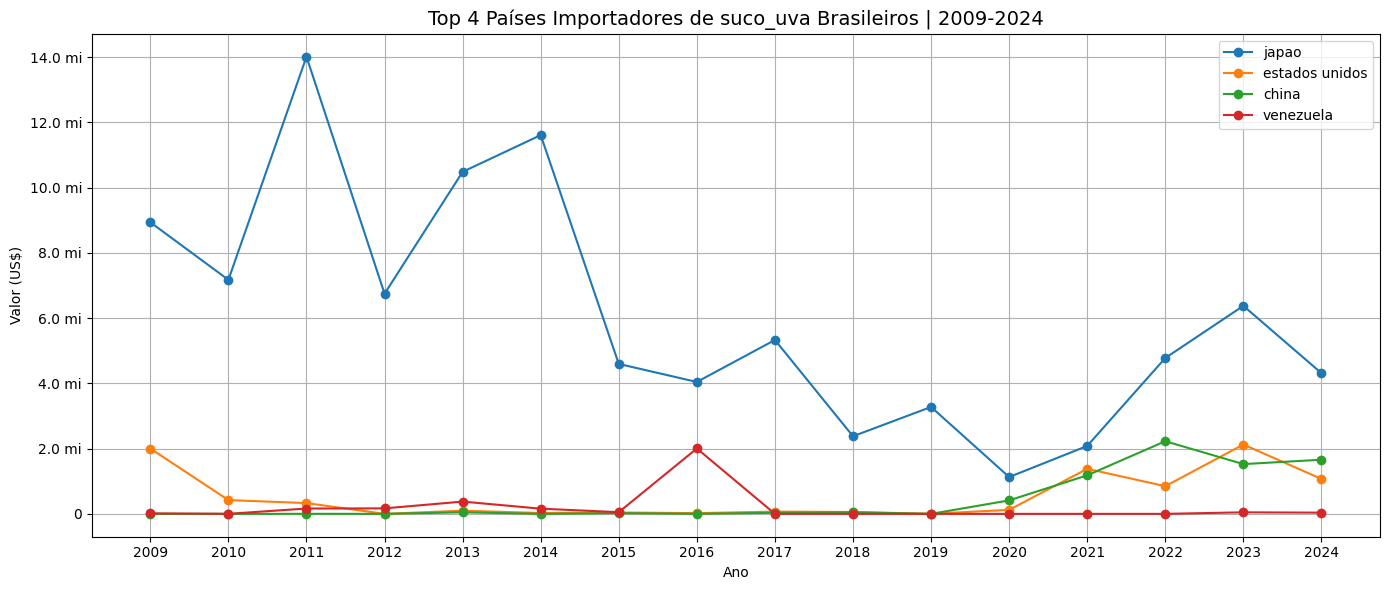

In [ ]:
# Função para formatar valores do eixo Y
def formatar_valores(valor, pos):
    if valor >= 1_000_000:
        return f'{valor / 1_000_000:.1f} mi'
    elif valor >= 1_000:
        return f'{valor / 1_000:.0f} mil'
    else:
        return int(valor)

# Top 10 países que mais importaram por valor total
top_paises_importadores_suco_uva = (dados_suco_uva.groupby('pais')['valor(US$)'].sum().sort_values(ascending=False).head(4))

# Lista de países ordenada por valor total
paises_ordenados_suco_uva = top_paises_importadores_suco_uva.index.tolist()

#plot
fig, ax = plt.subplots(figsize=(14, 6))

# Guarda os "handles" manualmente
handles = []
labels = []

# Plota os países na ordem correta
for pais in paises_ordenados_suco_uva:
    linha = dados_suco_uva[dados_suco_uva['pais'] == pais].groupby('ano')['valor(US$)'].sum()
    h, = ax.plot(linha.index, linha.values, marker='o', label=pais)
    handles.append(h)
    labels.append(pais)

# Aplica manualmente a legenda na ordem desejada
ax.legend(handles, labels)

# Eixos e formatação
ax.set_title('Top 4 Países Importadores de suco_uva Brasileiros | 2009-2024', fontsize=14)
ax.set_xlabel('Ano')
ax.set_ylabel('Valor (US$)')
ax.grid(True)
ax.xaxis.set_ticks(sorted(dados_suco_uva['ano'].unique()))
ax.yaxis.set_major_formatter(FuncFormatter(formatar_valores))

plt.tight_layout()
plt.show()

In [ ]:
top_paises_importadores_suco_uva

pais
japao             97279630
estados unidos     8621653
china              7157565
venezuela          3025511
Name: valor(US$), dtype: int64

## Exportação de Uvas frescas | Análise

Avaliando montante exportado de Uvas Frescas do Brasil para mundo entre os anos de 2009 e 2024.

In [ ]:
# Define o caminho do arquivo
arquivo_uvas_frescas = os.path.join("Export Dados", "Exportacao - Uvas Frescas.csv")

# Detecta o separador
sep = detectar_separador(arquivo_uvas_frescas)

# Tenta leitura com UTF-8, se falhar tenta ISO-8859-1
try:
    df_uvas_frescas = pd.read_csv(arquivo_uvas_frescas, sep=sep, encoding='utf-8')
except UnicodeDecodeError:
    df_uvas_frescas = pd.read_csv(arquivo_uvas_frescas, sep=sep, encoding='iso-8859-1')

# Remove a coluna 'id' se existir
if 'id' in df_uvas_frescas.columns:
    df_uvas_frescas = df_uvas_frescas.drop(columns=['id'])

# Padroniza os nomes das colunas
df_uvas_frescas.columns = [remover_acentos(col).strip().lower().replace(' ', '_') for col in df_uvas_frescas.columns]

# Renomeia 'paas' para 'pais' se necessário
if 'paas' in df_uvas_frescas.columns:
    df_uvas_frescas.rename(columns={'paas': 'pais'}, inplace=True)

# Aplica o dicionário de países
df_uvas_frescas['pais'] = df_uvas_frescas['pais'].map(dicionario_paises_normalizados).fillna(df_uvas_frescas['pais'])

# Seleciona apenas colunas que representam anos (começam com '19' ou '20')
colunas_ano = [col for col in df_uvas_frescas.columns if col.startswith('19') or col.startswith('20')]

# Garante que os anos estejam ordenados e sem repetição
anos_unicos = sorted(list(dict.fromkeys(colunas_ano)))

registros = []

# Loop pelos pares de colunas: quantidade e valor
for i in range(0, len(anos_unicos), 2):
    col_quant = anos_unicos[i]
    col_valor = anos_unicos[i+1] if i+1 < len(anos_unicos) else None

    if col_valor is None:
        continue  # pula se não houver par completo

    df_temp = df_uvas_frescas[['pais', col_quant, col_valor]].copy()
    df_temp.columns = ['pais', 'quantidade(L)', 'valor(US$)']
    df_temp['ano'] = int(col_quant)

    registros.append(df_temp)

# Junta todos os anos
dados_uvas_frescas = pd.concat(registros, ignore_index=True)

# Converte valores para numérico
dados_uvas_frescas['quantidade(L)'] = pd.to_numeric(dados_uvas_frescas['quantidade(L)'], errors='coerce').fillna(0)
dados_uvas_frescas['valor(US$)'] = pd.to_numeric(dados_uvas_frescas['valor(US$)'], errors='coerce').fillna(0)

# Remove países com todos os valores zerados
agrupado = dados_uvas_frescas.groupby('pais')[['quantidade(L)', 'valor(US$)']].sum()
paises_remover = agrupado[(agrupado['quantidade(L)'] == 0) & (agrupado['valor(US$)'] == 0)].index.tolist()
dados_uvas_frescas = dados_uvas_frescas[~dados_uvas_frescas['pais'].isin(paises_remover)]

# Filtra apenas de 2009 a 2024
dados_uvas_frescas = dados_uvas_frescas[(dados_uvas_frescas['ano'] >= 2009) & (dados_uvas_frescas['ano'] <= 2024)]

# Visualiza resultado
dados_uvas_frescas.head(10)

,pais,quantidade(L),valor(US$),ano
5460,Africa do Sul,15300,32130,2009
5461,alemanha,759594,1475757,2009
5462,angola,29700,110058,2009
5463,antigua e barbuda,0,0,2009
5464,arabia saudita,0,0,2009
5465,argelia,0,0,2009
5466,argentina,414008,929225,2009
5467,austria,0,0,2009
5468,bahamas,0,0,2009
5469,bahrein,0,0,2009


Avaliando quais paies possuem 0 exportação de Uvas frescas

In [ ]:
#Verificando se temos paises zerados
verificacao_uvas_frescas = dados_uvas_frescas.groupby('pais')[['quantidade(L)', 'valor(US$)']].sum()
paises_zerados_uvas_frescas = verificacao_uvas_frescas[(verificacao_uvas_frescas['quantidade(L)'] == 0) & (verificacao_uvas_frescas['valor(US$)'] == 0)]
print("Países com todos os valores zerados:")
print(paises_zerados_uvas_frescas)

Países com todos os valores zerados:
                      quantidade(L)  valor(US$)
pais                                           
cabo verde                        0           0
guadalupe                         0           0
mauricio                          0           0
porto rico                        0           0
republica dominicana              0           0
sao tome e principe               0           0


Organizando dos maiores para os menores

In [ ]:
top10_uvas_frescas = (dados_uvas_frescas.groupby('pais', as_index=False)['valor(US$)'].sum().sort_values(by='valor(US$)', ascending=False).head(10))

# Formata os valores como string com separador de milhar
top10_uvas_frescas['valor(US$)'] = top10_uvas_frescas['valor(US$)'].apply(lambda x: f'{int(x):,}')

# Visualiza como tabela
top10_uvas_frescas.reset_index(drop=True)

,pais,valor(US$)
0,Países Baixos,"749,619,273"
1,reino unido,"424,769,475"
2,estados unidos,"330,412,322"
3,alemanha,"56,933,674"
4,argentina,"49,621,718"
5,espanha,"39,858,516"
6,noruega,"30,096,182"
7,romenia,"28,569,808"
8,canada,"23,173,275"
9,emirados arabes unidos,"19,829,416"


## Gráficos de Exportação de Uvas Frescas do Brasil ao Mundo

Visualizando nossos dados:

- Gráfico de evolução da exportação total por ano
- Top 10 países por valor total

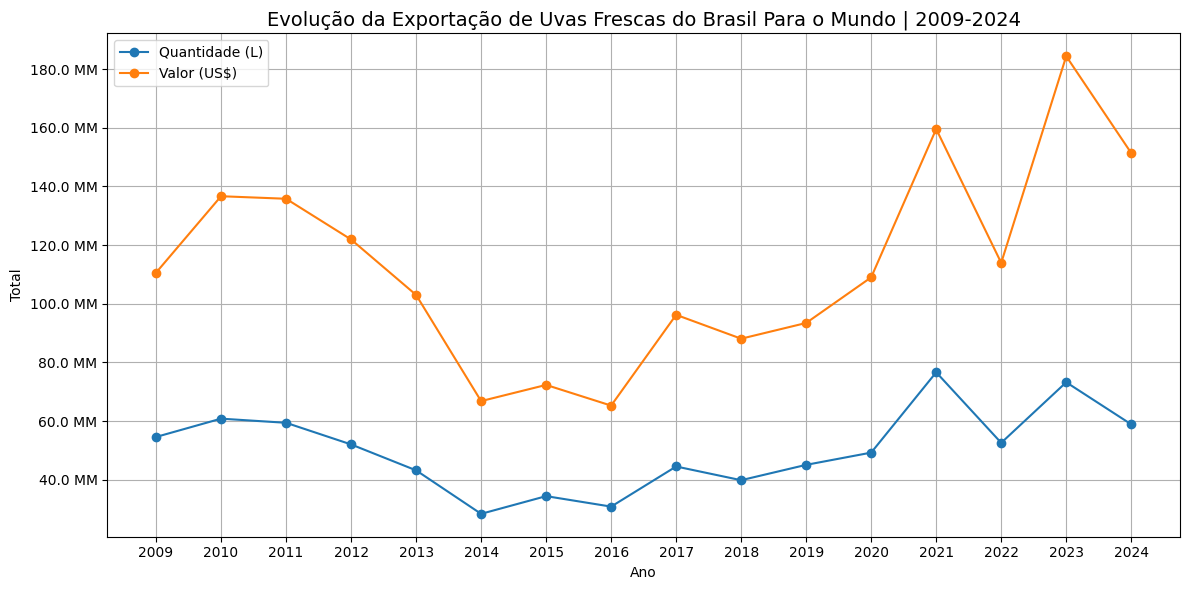

In [ ]:
# Gráfico Evolução total por ano
evolucao_uvas_frescas = dados_uvas_frescas.groupby('ano')[['quantidade(L)', 'valor(US$)']].sum().reset_index()

# Função de formatação
def formatar_valores(valor, pos):
    if valor >= 1_000_000:
        return f'{valor/1_000_000:.1f} MM'
    elif valor >= 1_000:
        return f'{valor/1_000:.0f} K'
    else:
        return int(valor)

# Gráfico com eixos formatados
plt.figure(figsize=(12, 6))
plt.plot(evolucao_uvas_frescas['ano'], evolucao_uvas_frescas['quantidade(L)'], marker='o', label='Quantidade (L)')
plt.plot(evolucao_uvas_frescas['ano'], evolucao_uvas_frescas['valor(US$)'], marker='o', label='Valor (US$)')
plt.title('Evolução da Exportação de Uvas Frescas do Brasil Para o Mundo | 2009-2024', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Total')
plt.grid(True)
plt.legend()
plt.xticks(ticks=evolucao_uvas_frescas['ano'].tolist())

# Aplica formatação ao eixo Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valores))

plt.tight_layout()
plt.show()


In [ ]:
evolucao_uvas_frescas

,ano,quantidade(L),valor(US$)
0,2009,54559684,110574457
1,2010,60805185,136648806
2,2011,59391482,135782857
3,2012,52018079,121898272
4,2013,43180556,102994687
5,2014,28347952,66790828
6,2015,34384683,72306951
7,2016,30813175,65255130
8,2017,44493449,96207277
9,2018,39818263,88066787


## Top 5 países que mais importaram Uvas Frescas por valor total

In [ ]:
# Top 5 países que mais importaram por valor total
top_paises_importadores_uvas_frescas = (
    dados_uvas_frescas.groupby('pais')['valor(US$)'].sum().sort_values(ascending=False).head(4).reset_index())

# Formata os valores em milhões ou milhares
def formatar_valor_tabela(valor):
    if valor >= 1_000_000:
        return f'{valor / 1_000_000:.2f} mi'
    elif valor >= 1_000:
        return f'{valor / 1_000:.0f} mil'
    else:
        return f'{valor:.0f}'

# Aplica a formatação
top_paises_importadores_uvas_frescas['valor_formatado'] = top_paises_importadores_uvas_frescas['valor(US$)'].apply(formatar_valor_tabela)

# Mostra a tabela final
tabela_final_uvas_frescas = top_paises_importadores_uvas_frescas[['pais', 'valor_formatado']]
tabela_final_uvas_frescas.columns = ['País', 'Valor Total (US$)']
print(tabela_final_uvas_frescas.to_string(index=False))

          País Valor Total (US$)
 Países Baixos         749.62 mi
   reino unido         424.77 mi
estados unidos         330.41 mi
      alemanha          56.93 mi


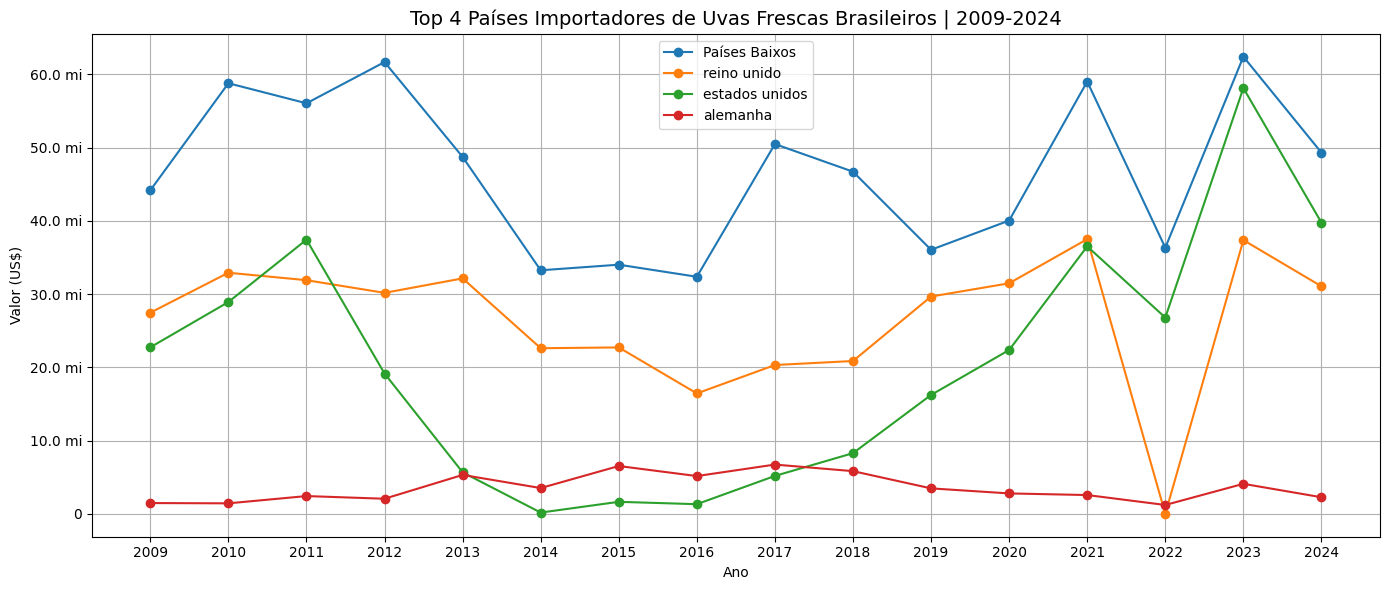

In [ ]:
# Função para formatar valores do eixo Y
def formatar_valores(valor, pos):
    if valor >= 1_000_000:
        return f'{valor / 1_000_000:.1f} mi'
    elif valor >= 1_000:
        return f'{valor / 1_000:.0f} mil'
    else:
        return int(valor)

# Top 10 países que mais importaram por valor total
top_paises_importadores_uvas_frescas = (dados_uvas_frescas.groupby('pais')['valor(US$)'].sum().sort_values(ascending=False).head(4))

# Lista de países ordenada por valor total
paises_ordenados_uvas_frescas = top_paises_importadores_uvas_frescas.index.tolist()

#plot
fig, ax = plt.subplots(figsize=(14, 6))

# Guarda os "handles" manualmente
handles = []
labels = []

# Plota os países na ordem correta
for pais in paises_ordenados_uvas_frescas:
    linha = dados_uvas_frescas[dados_uvas_frescas['pais'] == pais].groupby('ano')['valor(US$)'].sum()
    h, = ax.plot(linha.index, linha.values, marker='o', label=pais)
    handles.append(h)
    labels.append(pais)

# Aplica manualmente a legenda na ordem desejada
ax.legend(handles, labels)

# Eixos e formatação
ax.set_title('Top 4 Países Importadores de Uvas Frescas Brasileiros | 2009-2024', fontsize=14)
ax.set_xlabel('Ano')
ax.set_ylabel('Valor (US$)')
ax.grid(True)
ax.xaxis.set_ticks(sorted(dados_uvas_frescas['ano'].unique()))
ax.yaxis.set_major_formatter(FuncFormatter(formatar_valores))

plt.tight_layout()
plt.show()

In [ ]:
top_paises_importadores_uvas_frescas

pais
Países Baixos     749619273
reino unido       424769475
estados unidos    330412322
alemanha           56933674
Name: valor(US$), dtype: int64

## Comparativo de exportação por categoria  x valor US$ entre os anos de 2009 e 2024

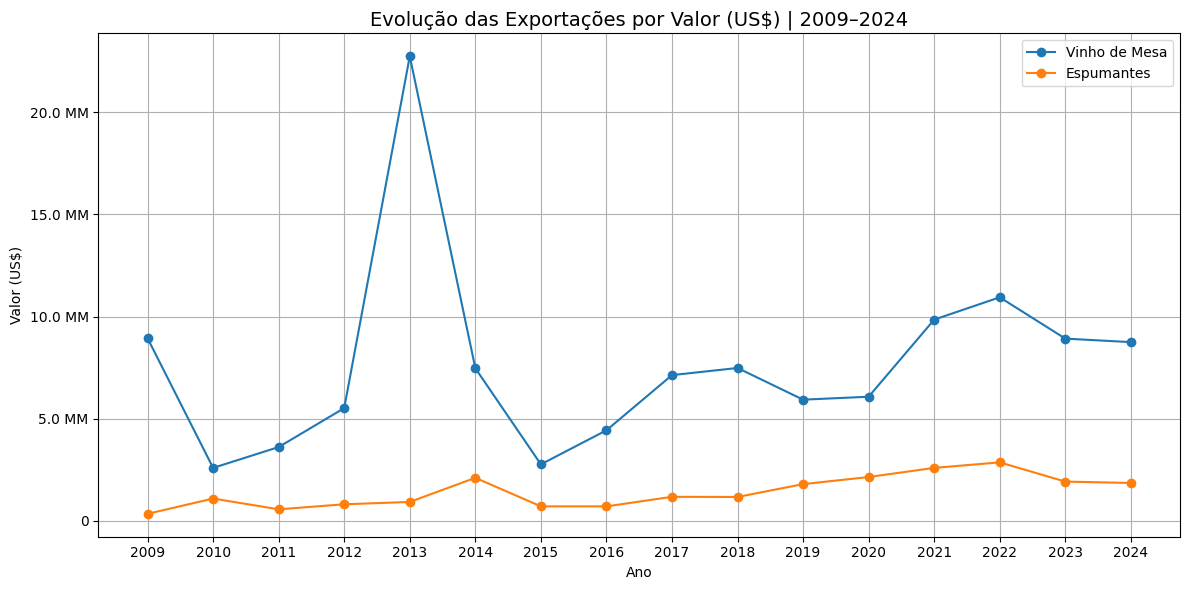

,ano,quantidade(L),valor(US$)
0,2009,25514198,8940988
1,2010,1280574,2595303
2,2011,1214834,3615120
3,2012,5775376,5521293
4,2013,9149059,22744845
5,2014,2324029,7472795
6,2015,1198479,2769160
7,2016,1786549,4434704
8,2017,2889572,7135607
9,2018,3856162,7486063


In [ ]:
# Função para formatar valores no eixo Y
def formatar_valores(valor, pos):
    if valor >= 1_000_000:
        return f'{valor/1_000_000:.1f} MM'
    elif valor >= 1_000:
        return f'{valor/1_000:.0f} K'
    else:
        return int(valor)

# Criando a figura
plt.figure(figsize=(12, 6))

# Plot de cada categoria
plt.plot(evolucao_vinhos['ano'], evolucao_vinhos['valor(US$)'],marker='o', label='Vinho de Mesa')
plt.plot(evolucao_espumantes['ano'], evolucao_espumantes['valor(US$)'],marker='o', label='Espumantes')

# Eixos e título
plt.title('Evolução das Exportações por Valor (US$) | 2009–2024', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Valor (US$)')
plt.grid(True)
#legendas
plt.legend()

# Aplicar os anos no eixo X
plt.xticks(ticks=evolucao_suco_uva['ano'].tolist())

# Aplicar a formatação do eixo Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valores))

# Ajuste de layout e exibição
plt.tight_layout()
plt.show()

## Gerando comparativo sobre a exportação total versus a exportação de vinhos de Mesa

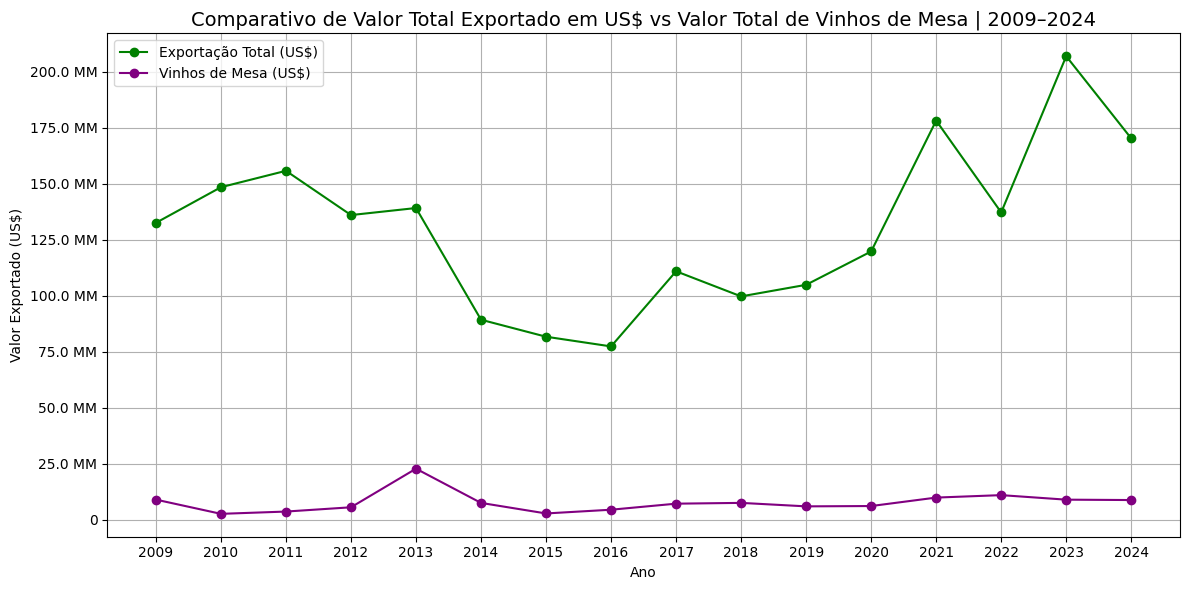

In [ ]:
# Função de formatação
def formatar_valores(valor, pos):
    if valor >= 1_000_000:
        return f'{valor/1_000_000:.1f} MM'
    elif valor >= 1_000:
        return f'{valor/1_000:.0f} K'
    else:
        return int(valor)

# Gráfico comparativo
plt.figure(figsize=(12, 6))

# Linha de valor total de exportações
plt.plot(evolucao_total['ano'], evolucao_total['valor_usd'], marker='o', color='green', label='Exportação Total (US$)')

# Linha de valor de exportações de vinhos de mesa
plt.plot(evolucao_vinhos['ano'], evolucao_vinhos['valor(US$)'], marker='o', color='purple', label='Vinhos de Mesa (US$)')

# Configurações do gráfico
plt.title('Comparativo de Valor Total Exportado em US$ vs Valor Total de Vinhos de Mesa | 2009–2024', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Valor Exportado (US$)')
plt.grid(True)
plt.legend()
plt.xticks(ticks=evolucao_total['ano'].tolist())
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valores))

plt.tight_layout()
plt.show()